## Выпускная квалификационная работа Яневица Рональда Бруновича
### студента группы 15702 курса "Data Science PRO" ЦДО МГТУ им. Н.Э. Баумана
#### Тема исследования "Прогнозирование конечных свойств новых материалов (композиционных материалов)".
## Часть 2
### 2. Построение модели машинного обучения для прогнозирования параметра: "Модуль упругости при растяжении".

In [1]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Необходимо обучить алгоритм машинного обучения, который будет определять значения:
# 1. Модуль упругости при растяжении, ГПа;
# 2. Прочность при растяжении, МПа.
# При построении модели необходимо 30% данных оставить на тестирование модели, на остальных происходит обучение моделей. 
# При построении моделей провести поиск гиперпараметров модели с помощью поиска по сетке с перекрестной проверкой, 
# количество блоков равно 10.
# 
# Написать нейронную сеть, которая будет рекомендовать:
# 3. Соотношение матрица-наполнитель.
# 
# Таким образом, нам надо решить 3 задачи, для каждой надо создать входные данные, причём набор признаков 
# для каждой будет один, т.е. надо создать один массив Х и 3 массива Y.

cleaned_df = pd.read_excel("CleanedDataFrame.xlsx", index_col='Unnamed: 0')
cleaned_df['Угол нашивки'] = cleaned_df['Угол нашивки'].astype('category')
cleaned_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Плотность,813.0,NaN,NaN,NaN,1973.305080,69.536751,1801.940695,1923.566230,1976.800187,2019.065966,2150.793053
Модуль упругости,813.0,NaN,NaN,NaN,731.777187,326.047734,2.436909,496.873650,724.109184,951.030579,1588.677217
Количество отвердителя,813.0,NaN,NaN,NaN,111.346533,26.594886,41.886277,93.290977,111.259275,130.163998,181.828448
Содержание эпоксидных групп,813.0,NaN,NaN,NaN,22.143151,2.343374,15.881668,20.555344,22.130284,23.914238,28.620116
Температура вспышки,813.0,NaN,NaN,NaN,286.077341,39.538176,186.508613,258.370169,286.302097,313.046103,385.894771
Поверхностная плотность,813.0,NaN,NaN,NaN,480.130547,275.945272,0.603740,264.538975,453.919475,691.280873,1238.476416
Потребление смолы,813.0,NaN,NaN,NaN,217.511640,56.121929,72.530873,180.329055,217.481262,255.304191,359.052220
Угол нашивки,813.0,2.0,90.0,455.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Шаг нашивки,813.0,NaN,NaN,NaN,6.912574,2.473641,0.145034,5.167349,6.936649,8.582372,13.484945
Плотность нашивки,813.0,NaN,NaN,NaN,58.431672,9.194747,39.338977,51.690374,58.271705,64.798020,80.031619


In [3]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 813 entries, 1 to 1021
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Плотность                        813 non-null    float64 
 1   Модуль упругости                 813 non-null    float64 
 2   Количество отвердителя           813 non-null    float64 
 3   Содержание эпоксидных групп      813 non-null    float64 
 4   Температура вспышки              813 non-null    float64 
 5   Поверхностная плотность          813 non-null    float64 
 6   Потребление смолы                813 non-null    float64 
 7   Угол нашивки                     813 non-null    category
 8   Шаг нашивки                      813 non-null    float64 
 9   Плотность нашивки                813 non-null    float64 
 10  Соотношение матрица_наполнитель  813 non-null    float64 
 11  Прочность при растяжении         813 non-null    float64 
 12  Модуль упруг

In [4]:
# Из очищенного от выбросов датасета создаём один массив признаков Х и 3 массива целевых переменных Y.

X_columns = [
  'Плотность', 
  'Модуль упругости',
  'Количество отвердителя', 
  'Содержание эпоксидных групп',
  'Температура вспышки', 
  'Поверхностная плотность',
  'Потребление смолы', 
  'Угол нашивки',
  'Шаг нашивки', 
  'Плотность нашивки'
]

y1_columns = ['Прочность при растяжении']
y2_columns = ['Модуль упругости при растяжении']
y3_columns = ['Соотношение матрица_наполнитель']

X = cleaned_df.loc[:, X_columns]
y1 = cleaned_df.loc[:, y1_columns]
y2 = cleaned_df.loc[:, y2_columns]
y3 = cleaned_df.loc[:, y3_columns]


In [5]:
print(X.info())
print("=" * 70)
print(y1.info())
print("=" * 70)
print(y2.info())
print("=" * 70)
print(y3.info())

<class 'pandas.core.frame.DataFrame'>
Index: 813 entries, 1 to 1021
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Плотность                    813 non-null    float64 
 1   Модуль упругости             813 non-null    float64 
 2   Количество отвердителя       813 non-null    float64 
 3   Содержание эпоксидных групп  813 non-null    float64 
 4   Температура вспышки          813 non-null    float64 
 5   Поверхностная плотность      813 non-null    float64 
 6   Потребление смолы            813 non-null    float64 
 7   Угол нашивки                 813 non-null    category
 8   Шаг нашивки                  813 non-null    float64 
 9   Плотность нашивки            813 non-null    float64 
dtypes: category(1), float64(9)
memory usage: 64.4 KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 813 entries, 1 to 1021
Data columns (total 1 columns):
 #   Column                    N

Лучшие параметры: {'model__copy_X': True, 'model__fit_intercept': False}
Лучшее MSE (на кросс-валидации): 9.164019298400046

Метрики качества на тестовой выборке:
R2: 0.043
Max Error: 7.6
MSE: 9.1
RMSE: 3.0
MAE: 2.5
MAPE: 0.03%


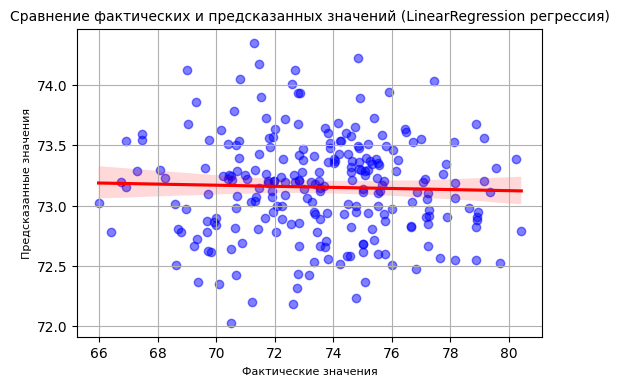

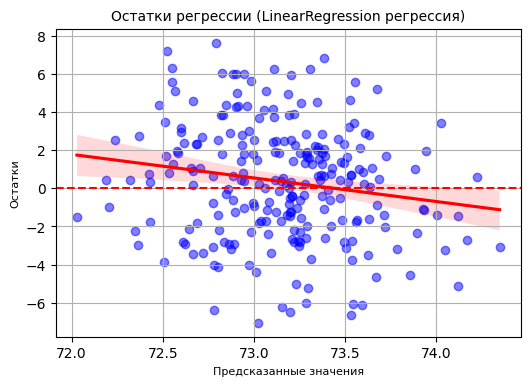

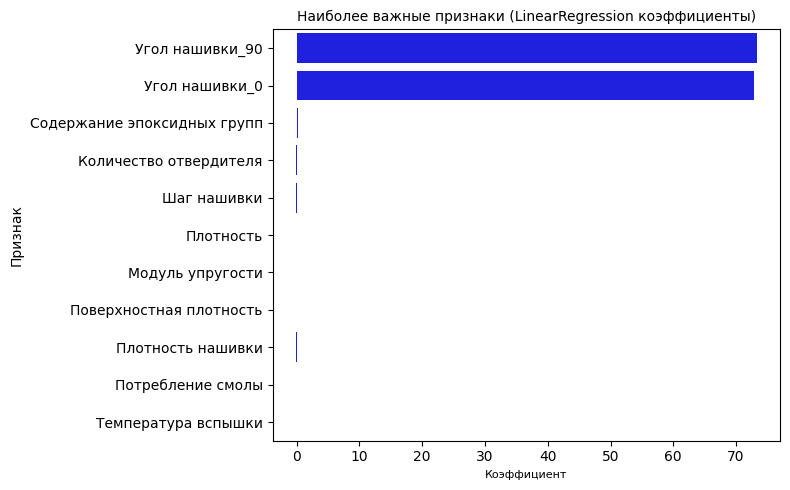

In [13]:
# Протестируем несколько вариантов моделей, я выбрал 13 наиболее популярных моделей
# LinearRegression
# Lasso
# LassoCV
# Ridge
# ElasticNet
# PolynomialFeatures
# KNeighborsRegressor
# BayesianRidge
# DecisionTreeRegressor
# RandomForestRegressor
# SVR
# MLPRegressor
# AdaBoostRegressor

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, max_error, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
 
# Разделение на обучающую и тестовую выборки
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.3, random_state=1101)
 
# Определение числовых и категориальных столбцов
numeric_features = X.select_dtypes(include=['float64']).columns
categorical_features = X.select_dtypes(include=['category']).columns
 
# Создание преобразователей для числовых и категориальных данных
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

# Объединение преобразований в ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])
 
# Создание пайплана для модели
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])
 
# Параметры для Grid Search
param_grid = {
    'model__fit_intercept': [True, False],
    'model__copy_X': [True, False]
}
 
# Настройка GridSearchCV с перекрёстной проверкой
grid_search = GridSearchCV(pipeline, param_grid, cv=10, 
                          scoring='neg_mean_squared_error',
                          return_train_score=True, n_jobs=-1)
 
# Обучение модели с поиском по сетке
grid_search.fit(X_train, y2_train)
 
# Вывод лучших параметров
print("Лучшие параметры:", grid_search.best_params_)
print("Лучшее MSE (на кросс-валидации):", -grid_search.best_score_)
 
# Предсказание на тестовой выборке
y_pred = grid_search.predict(X_test)
 
# Вычисление метрик качества
r2 = r2_score(y2_test, y_pred) * -1
max_err = max_error(y2_test, y_pred)
mse = mean_squared_error(y2_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y2_test, y_pred)
mape = mean_absolute_percentage_error(y2_test, y_pred)

# Создание датафрейма с метриками
metrics_LinearRegression = pd.DataFrame({
    'Метрика': ['R2', 'Max Error', 'MSE', 'RMSE', 'MAE', 'MAPE (%)'],
    'Значение LinearRegression': [r2, max_err, mse, rmse, mae, mape]
})
  
# Вывод метрик качества
print("\nМетрики качества на тестовой выборке:")
print(f"R2: {r2:.3f}")
print(f"Max Error: {max_err:.1f}")
print(f"MSE: {mse:.1f}")
print(f"RMSE: {rmse:.1f}")
print(f"MAE: {mae:.1f}")
print(f"MAPE: {mape:.2f}%")
 
# Визуализация результатов
plt.figure(figsize=(6, 4))
sns.regplot(x=y2_test, y=y_pred, color='blue', line_kws={'color': 'red'}, scatter_kws={'alpha':0.5})
plt.xlabel('Фактические значения', fontsize = 8)
plt.ylabel('Предсказанные значения', fontsize = 8)
plt.title('Сравнение фактических и предсказанных значений (LinearRegression регрессия)', fontsize = 10)
plt.grid(True)
plt.show()
 
# Визуализация остатков регрессии
residuals = y2_test['Модуль упругости при растяжении'] - y_pred.squeeze()
plt.figure(figsize=(6, 4))
sns.regplot(x=y_pred, y=residuals, color='blue', line_kws={'color': 'red'}, scatter_kws={'alpha':0.5})
#sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Предсказанные значения', fontsize = 8)
plt.ylabel('Остатки', fontsize = 8)
plt.title('Остатки регрессии (LinearRegression регрессия)', fontsize = 10)
plt.grid(True)
plt.show()
 
# Важность признаков для модели
# Получение имен признаков после OneHotEncoding
feature_names = (list(numeric_features) + 
                 list(grid_search.best_estimator_.named_steps['preprocessor']
                      .named_transformers_['cat']
                      .named_steps['onehot']
                      .get_feature_names_out(categorical_features)))
 
# Создание DataFrame с коэффициентами
coef_LinearRegression = pd.DataFrame({
    'Признак': feature_names,
    'Коэффициент': grid_search.best_estimator_.named_steps['model'].coef_.squeeze()
}).sort_values('Коэффициент', key=abs, ascending=False)
 
# Визуализация важности признаков
plt.figure(figsize=(8, 5))
sns.barplot(data=coef_LinearRegression.head(20), x='Коэффициент', y='Признак', color='blue')
plt.title('Наиболее важные признаки (LinearRegression коэффициенты)', fontsize = 10)
plt.xlabel('Коэффициент', fontsize = 8)
plt.tight_layout()
plt.show()


Лучшие параметры: {'model__alpha': 1, 'model__max_iter': 1000, 'model__selection': 'cyclic'}
Лучшее MSE (на кросс-валидации): 9.052210885581479

Метрики качества на тестовой выборке:
R2: 0.015
Max Error: 7.3
MSE: 8.8
RMSE: 3.0
MAE: 2.4
MAPE: 0.03%


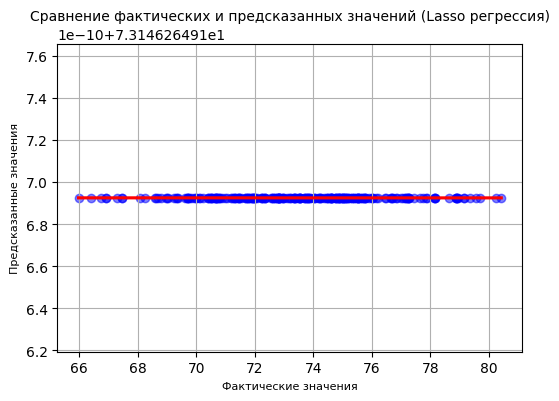

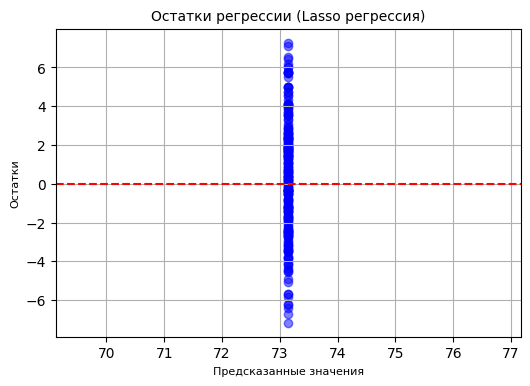

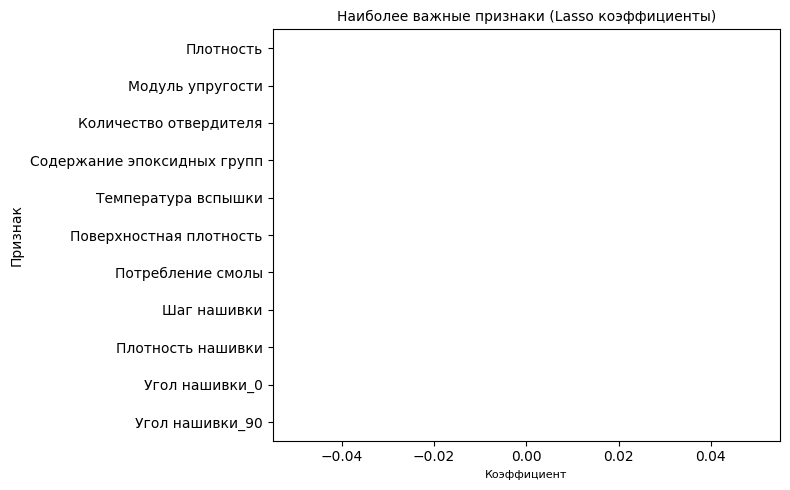

In [17]:
from sklearn.linear_model import Lasso
 
# Разделение на обучающую и тестовую выборки
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.3, random_state=1101)
 
# Определение числовых и категориальных столбцов
numeric_features = X.select_dtypes(include=['float64']).columns
categorical_features = X.select_dtypes(include=['category']).columns
 
# Создание преобразователей для числовых и категориальных данных
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

# Объединение преобразований в ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])
 
# Создание пайплана для модели
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Lasso(random_state=1101))
])
 
# Параметры для Grid Search
param_grid = {
    'model__alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'model__max_iter': [1000, 2000, 5000],
    'model__selection': ['cyclic', 'random']
}
 
# Настройка GridSearchCV с перекрёстной проверкой
grid_search = GridSearchCV(pipeline, param_grid, cv=10, 
                          scoring='neg_mean_squared_error',
                          return_train_score=True, n_jobs=-1)
 
# Обучение модели с поиском по сетке
grid_search.fit(X_train, y2_train)
 
# Вывод лучших параметров
print("Лучшие параметры:", grid_search.best_params_)
print("Лучшее MSE (на кросс-валидации):", -grid_search.best_score_)
 
# Предсказание на тестовой выборке
y_pred = grid_search.predict(X_test)
 
# Вычисление метрик качества
r2 = r2_score(y2_test, y_pred) * -1
max_err = max_error(y2_test, y_pred)
mse = mean_squared_error(y2_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y2_test, y_pred)
mape = mean_absolute_percentage_error(y2_test, y_pred)

# Создание датафрейма с метриками
metrics_Lasso = pd.DataFrame({
    'Метрика': ['R2', 'Max Error', 'MSE', 'RMSE', 'MAE', 'MAPE (%)'],
    'Значение Lasso': [r2, max_err, mse, rmse, mae, mape]
})
  
# Вывод метрик качества
print("\nМетрики качества на тестовой выборке:")
print(f"R2: {r2:.3f}")
print(f"Max Error: {max_err:.1f}")
print(f"MSE: {mse:.1f}")
print(f"RMSE: {rmse:.1f}")
print(f"MAE: {mae:.1f}")
print(f"MAPE: {mape:.2f}%")
 
# Визуализация результатов
plt.figure(figsize=(6, 4))
sns.regplot(x=y2_test, y=y_pred, color='blue', line_kws={'color': 'red'}, scatter_kws={'alpha':0.5})
plt.xlabel('Фактические значения', fontsize = 8)
plt.ylabel('Предсказанные значения', fontsize = 8)
plt.title('Сравнение фактических и предсказанных значений (Lasso регрессия)', fontsize = 10)
plt.grid(True)
plt.show()
 
# Визуализация остатков регрессии
residuals = y2_test['Модуль упругости при растяжении'] - y_pred
plt.figure(figsize=(6, 4))
sns.regplot(x=y_pred, y=residuals, color='blue', line_kws={'color': 'red'}, scatter_kws={'alpha':0.5})
#sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Предсказанные значения', fontsize = 8)
plt.ylabel('Остатки', fontsize = 8)
plt.title('Остатки регрессии (Lasso регрессия)', fontsize = 10)
plt.grid(True)
plt.show()
 
# Важность признаков для модели
# Получение имен признаков после OneHotEncoding
feature_names = (list(numeric_features) + 
                 list(grid_search.best_estimator_.named_steps['preprocessor']
                      .named_transformers_['cat']
                      .named_steps['onehot']
                      .get_feature_names_out(categorical_features)))
 
# Создание DataFrame с коэффициентами
coef_Lasso = pd.DataFrame({
    'Признак': feature_names,
    'Коэффициент': grid_search.best_estimator_.named_steps['model'].coef_
}).sort_values('Коэффициент', key=abs, ascending=False)
 
# Визуализация важности признаков
plt.figure(figsize=(8, 5))
sns.barplot(data=coef_Lasso.head(20), x='Коэффициент', y='Признак', color='blue')
plt.title('Наиболее важные признаки (Lasso коэффициенты)', fontsize = 10)
plt.xlabel('Коэффициент', fontsize = 8)
plt.tight_layout()
plt.show()


Лучшие параметры: {'model__eps': 0.01, 'model__max_iter': 1000, 'model__n_alphas': 50}
Лучшее MSE (на кросс-валидации): 9.144998366742112

Метрики качества на тестовой выборке:
R2: 0.016
Max Error: 7.4
MSE: 8.9
RMSE: 3.0
MAE: 2.4
MAPE: 0.03%


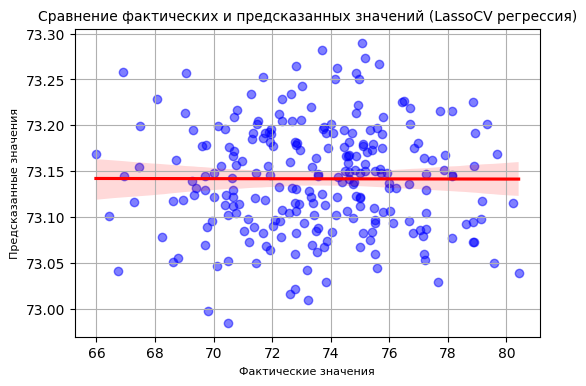

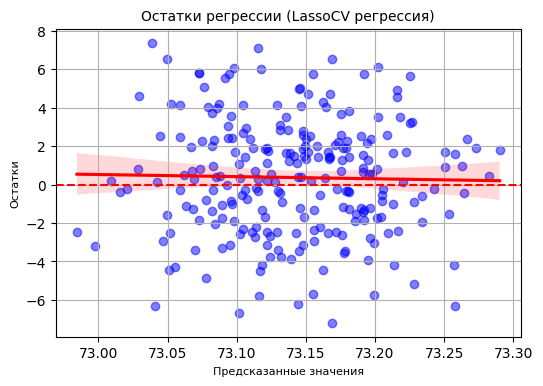

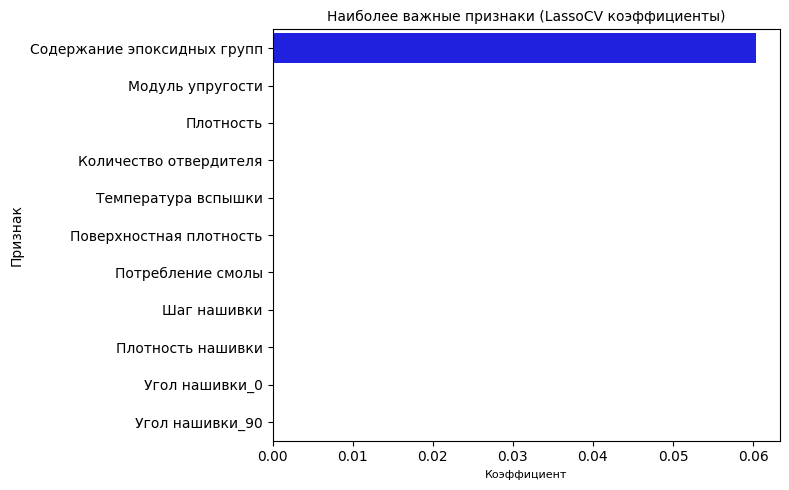

In [16]:
from sklearn.linear_model import LassoCV
 
# Разделение на обучающую и тестовую выборки
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.3, random_state=1101)
 
# Определение числовых и категориальных столбцов
numeric_features = X.select_dtypes(include=['float64']).columns
categorical_features = X.select_dtypes(include=['category']).columns
 
# Создание преобразователей для числовых и категориальных данных
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

# Объединение преобразований в ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])
 
# Создание пайплана для модели
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LassoCV(cv=10, random_state=1101))
])
 
# Параметры для Grid Search
param_grid = {
    'model__eps': [0.001, 0.01, 0.1],
    'model__n_alphas': [50, 100, 200],
    'model__max_iter': [1000, 2000]
}
 
# Настройка GridSearchCV с перекрёстной проверкой
grid_search = GridSearchCV(pipeline, param_grid, cv=10, 
                          scoring='neg_mean_squared_error',
                          return_train_score=True, n_jobs=-1)
 
# Обучение модели с поиском по сетке
grid_search.fit(X_train, y2_train)
 
# Вывод лучших параметров
print("Лучшие параметры:", grid_search.best_params_)
print("Лучшее MSE (на кросс-валидации):", -grid_search.best_score_)
 
# Предсказание на тестовой выборке
y_pred = grid_search.predict(X_test)
 
# Вычисление метрик качества
r2 = r2_score(y2_test, y_pred) * -1
max_err = max_error(y2_test, y_pred)
mse = mean_squared_error(y2_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y2_test, y_pred)
mape = mean_absolute_percentage_error(y2_test, y_pred)

# Создание датафрейма с метриками
metrics_LassoCV = pd.DataFrame({
    'Метрика': ['R2', 'Max Error', 'MSE', 'RMSE', 'MAE', 'MAPE (%)'],
    'Значение LassoCV': [r2, max_err, mse, rmse, mae, mape]
})
  
# Вывод метрик качества
print("\nМетрики качества на тестовой выборке:")
print(f"R2: {r2:.3f}")
print(f"Max Error: {max_err:.1f}")
print(f"MSE: {mse:.1f}")
print(f"RMSE: {rmse:.1f}")
print(f"MAE: {mae:.1f}")
print(f"MAPE: {mape:.2f}%")
 
# Визуализация результатов
plt.figure(figsize=(6, 4))
sns.regplot(x=y2_test, y=y_pred, color='blue', line_kws={'color': 'red'}, scatter_kws={'alpha':0.5})
plt.xlabel('Фактические значения', fontsize = 8)
plt.ylabel('Предсказанные значения', fontsize = 8)
plt.title('Сравнение фактических и предсказанных значений (LassoCV регрессия)', fontsize = 10)
plt.grid(True)
plt.show()
 
# Визуализация остатков регрессии
residuals = y2_test['Модуль упругости при растяжении'] - y_pred
plt.figure(figsize=(6, 4))
sns.regplot(x=y_pred, y=residuals, color='blue', line_kws={'color': 'red'}, scatter_kws={'alpha':0.5})
#sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Предсказанные значения', fontsize = 8)
plt.ylabel('Остатки', fontsize = 8)
plt.title('Остатки регрессии (LassoCV регрессия)', fontsize = 10)
plt.grid(True)
plt.show()
 
# Важность признаков для модели
# Получение имен признаков после OneHotEncoding
feature_names = (list(numeric_features) + 
                 list(grid_search.best_estimator_.named_steps['preprocessor']
                      .named_transformers_['cat']
                      .named_steps['onehot']
                      .get_feature_names_out(categorical_features)))
 
# Создание DataFrame с коэффициентами
coef_LassoCV = pd.DataFrame({
    'Признак': feature_names,
    'Коэффициент': grid_search.best_estimator_.named_steps['model'].coef_
}).sort_values('Коэффициент', key=abs, ascending=False)
 
# Визуализация важности признаков
plt.figure(figsize=(8, 5))
sns.barplot(data=coef_LassoCV.head(20), x='Коэффициент', y='Признак', color='blue')
plt.title('Наиболее важные признаки (LassoCV коэффициенты)', fontsize = 10)
plt.xlabel('Коэффициент', fontsize = 8)
plt.tight_layout()
plt.show()

Лучшие параметры: {'model__alpha': 1000}
Лучшее MSE (на кросс-валидации): 9.047170388511816

Метрики качества на тестовой выборке:
R2: 0.020
Max Error: 7.4
MSE: 8.9
RMSE: 3.0
MAE: 2.4
MAPE: 0.03%


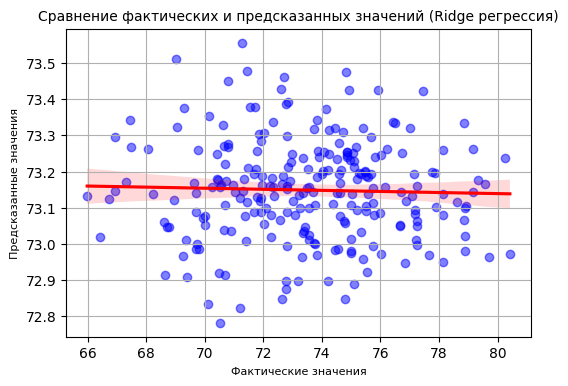

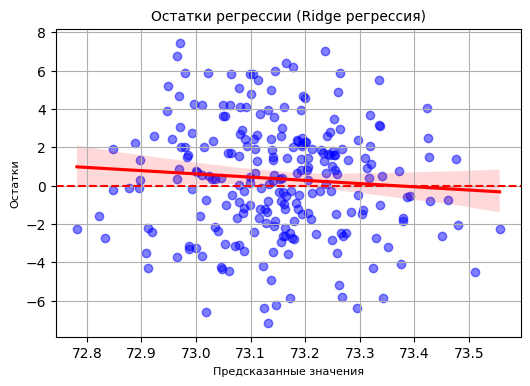

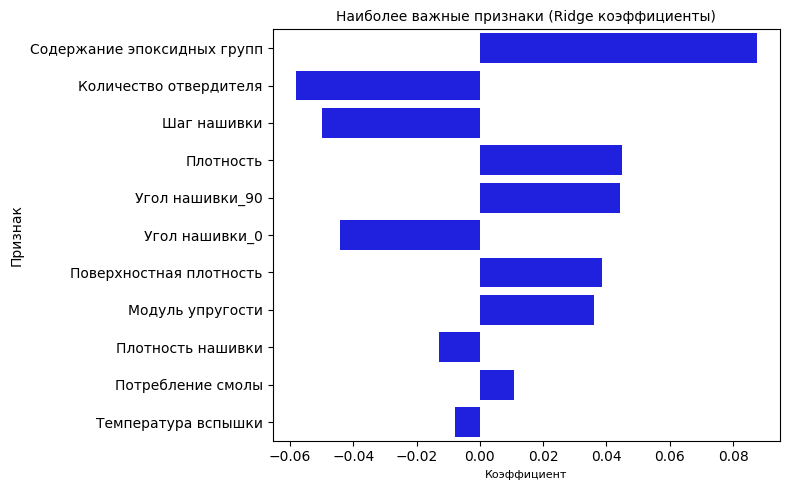

In [18]:
from sklearn.linear_model import Ridge
 
# Разделение на обучающую и тестовую выборки
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.3, random_state=1101)
 
# Определение числовых и категориальных столбцов
numeric_features = X.select_dtypes(include=['float64']).columns
categorical_features = X.select_dtypes(include=['category']).columns
 
# Создание преобразователей для числовых и категориальных данных
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

# Объединение преобразований в ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])
 
# Создание пайплана для модели
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Ridge(random_state=1101))
])
 
# Параметры для Grid Search
param_grid = {
    'model__alpha': [0.01, 0.1, 1, 10, 100, 1000],
}
 
# Настройка GridSearchCV с перекрёстной проверкой
grid_search = GridSearchCV(pipeline, param_grid, cv=10, 
                          scoring='neg_mean_squared_error',
                          return_train_score=True, n_jobs=-1)
 
# Обучение модели с поиском по сетке
grid_search.fit(X_train, y2_train)
 
# Вывод лучших параметров
print("Лучшие параметры:", grid_search.best_params_)
print("Лучшее MSE (на кросс-валидации):", -grid_search.best_score_)
 
# Предсказание на тестовой выборке
y_pred = grid_search.predict(X_test)
 
# Вычисление метрик качества
r2 = r2_score(y2_test, y_pred) * -1
max_err = max_error(y2_test, y_pred)
mse = mean_squared_error(y2_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y2_test, y_pred)
mape = mean_absolute_percentage_error(y2_test, y_pred)

# Создание датафрейма с метриками
metrics_Ridge = pd.DataFrame({
    'Метрика': ['R2', 'Max Error', 'MSE', 'RMSE', 'MAE', 'MAPE (%)'],
    'Значение Ridge': [r2, max_err, mse, rmse, mae, mape]
})
  
# Вывод метрик качества
print("\nМетрики качества на тестовой выборке:")
print(f"R2: {r2:.3f}")
print(f"Max Error: {max_err:.1f}")
print(f"MSE: {mse:.1f}")
print(f"RMSE: {rmse:.1f}")
print(f"MAE: {mae:.1f}")
print(f"MAPE: {mape:.2f}%")
 
# Визуализация результатов
plt.figure(figsize=(6, 4))
sns.regplot(x=y2_test, y=y_pred, color='blue', line_kws={'color': 'red'}, scatter_kws={'alpha':0.5})
plt.xlabel('Фактические значения', fontsize = 8)
plt.ylabel('Предсказанные значения', fontsize = 8)
plt.title('Сравнение фактических и предсказанных значений (Ridge регрессия)', fontsize = 10)
plt.grid(True)
plt.show()
 
# Визуализация остатков регрессии
residuals = y2_test['Модуль упругости при растяжении'] - y_pred
plt.figure(figsize=(6, 4))
sns.regplot(x=y_pred, y=residuals, color='blue', line_kws={'color': 'red'}, scatter_kws={'alpha':0.5})
#sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Предсказанные значения', fontsize = 8)
plt.ylabel('Остатки', fontsize = 8)
plt.title('Остатки регрессии (Ridge регрессия)', fontsize = 10)
plt.grid(True)
plt.show()
 
# Важность признаков для модели
# Получение имен признаков после OneHotEncoding
feature_names = (list(numeric_features) + 
                 list(grid_search.best_estimator_.named_steps['preprocessor']
                      .named_transformers_['cat']
                      .named_steps['onehot']
                      .get_feature_names_out(categorical_features)))
 
# Создание DataFrame с коэффициентами
coef_Ridge = pd.DataFrame({
    'Признак': feature_names,
    'Коэффициент': grid_search.best_estimator_.named_steps['model'].coef_
}).sort_values('Коэффициент', key=abs, ascending=False)
 
# Визуализация важности признаков
plt.figure(figsize=(8, 5))
sns.barplot(data=coef_Ridge.head(20), x='Коэффициент', y='Признак', color='blue')
plt.title('Наиболее важные признаки (Ridge коэффициенты)', fontsize = 10)
plt.xlabel('Коэффициент', fontsize = 8)
plt.tight_layout()
plt.show()


Лучшие параметры: {'model__alpha': 0.5, 'model__l1_ratio': 0.7, 'model__max_iter': 1000}
Лучшее MSE (на кросс-валидации): 9.052210885581479

Метрики качества на тестовой выборке:
R2: 0.015
Max Error: 7.3
MSE: 8.8
RMSE: 3.0
MAE: 2.4
MAPE: 0.03%


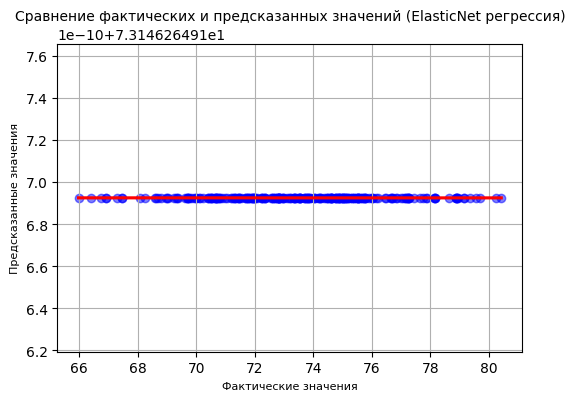

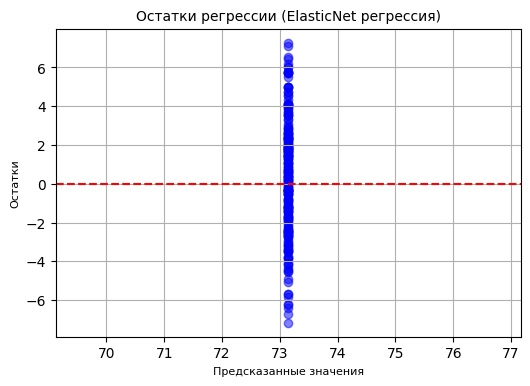

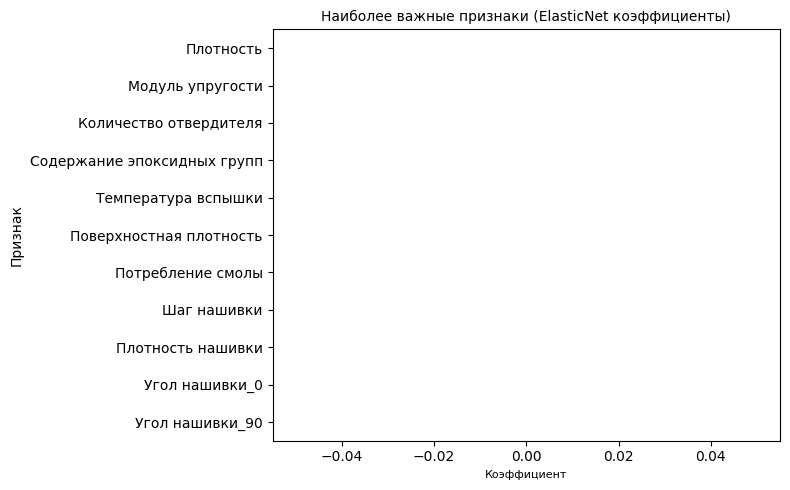

In [19]:
from sklearn.linear_model import ElasticNet
 
# Разделение на обучающую и тестовую выборки
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.3, random_state=1101)
 
# Определение числовых и категориальных столбцов
numeric_features = X.select_dtypes(include=['float64']).columns
categorical_features = X.select_dtypes(include=['category']).columns
 
# Создание преобразователей для числовых и категориальных данных
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

# Объединение преобразований в ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])
 
# Создание пайплана для модели
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', ElasticNet(random_state=1101))
])
 
# Параметры для Grid Search
param_grid = {
    'model__alpha': [0.1, 0.5, 1.0, 2.0],
    'model__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
    'model__max_iter': [1000, 2000]
}
 
# Настройка GridSearchCV с перекрёстной проверкой
grid_search = GridSearchCV(pipeline, param_grid, cv=10, 
                          scoring='neg_mean_squared_error',
                          return_train_score=True, n_jobs=-1)
 
# Обучение модели с поиском по сетке
grid_search.fit(X_train, y2_train)
 
# Вывод лучших параметров
print("Лучшие параметры:", grid_search.best_params_)
print("Лучшее MSE (на кросс-валидации):", -grid_search.best_score_)
 
# Предсказание на тестовой выборке
y_pred = grid_search.predict(X_test)
 
# Вычисление метрик качества
r2 = r2_score(y2_test, y_pred) * -1
max_err = max_error(y2_test, y_pred)
mse = mean_squared_error(y2_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y2_test, y_pred)
mape = mean_absolute_percentage_error(y2_test, y_pred)

# Создание датафрейма с метриками
metrics_ElasticNet = pd.DataFrame({
    'Метрика': ['R2', 'Max Error', 'MSE', 'RMSE', 'MAE', 'MAPE (%)'],
    'Значение ElasticNet': [r2, max_err, mse, rmse, mae, mape]
})
  
# Вывод метрик качества
print("\nМетрики качества на тестовой выборке:")
print(f"R2: {r2:.3f}")
print(f"Max Error: {max_err:.1f}")
print(f"MSE: {mse:.1f}")
print(f"RMSE: {rmse:.1f}")
print(f"MAE: {mae:.1f}")
print(f"MAPE: {mape:.2f}%")
 
# Визуализация результатов
plt.figure(figsize=(6, 4))
sns.regplot(x=y2_test, y=y_pred, color='blue', line_kws={'color': 'red'}, scatter_kws={'alpha':0.5})
plt.xlabel('Фактические значения', fontsize = 8)
plt.ylabel('Предсказанные значения', fontsize = 8)
plt.title('Сравнение фактических и предсказанных значений (ElasticNet регрессия)', fontsize = 10)
plt.grid(True)
plt.show()
 
# Визуализация остатков регрессии
residuals = y2_test['Модуль упругости при растяжении'] - y_pred
plt.figure(figsize=(6, 4))
sns.regplot(x=y_pred, y=residuals, color='blue', line_kws={'color': 'red'}, scatter_kws={'alpha':0.5})
#sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Предсказанные значения', fontsize = 8)
plt.ylabel('Остатки', fontsize = 8)
plt.title('Остатки регрессии (ElasticNet регрессия)', fontsize = 10)
plt.grid(True)
plt.show()
 
# Важность признаков для модели
# Получение имен признаков после OneHotEncoding
feature_names = (list(numeric_features) + 
                 list(grid_search.best_estimator_.named_steps['preprocessor']
                      .named_transformers_['cat']
                      .named_steps['onehot']
                      .get_feature_names_out(categorical_features)))
 
# Создание DataFrame с коэффициентами
coef_ElasticNet = pd.DataFrame({
    'Признак': feature_names,
    'Коэффициент': grid_search.best_estimator_.named_steps['model'].coef_
}).sort_values('Коэффициент', key=abs, ascending=False)
 
# Визуализация важности признаков
plt.figure(figsize=(8, 5))
sns.barplot(data=coef_ElasticNet.head(20), x='Коэффициент', y='Признак', color='blue')
plt.title('Наиболее важные признаки (ElasticNet коэффициенты)', fontsize = 10)
plt.xlabel('Коэффициент', fontsize = 8)
plt.tight_layout()
plt.show()


Лучшие параметры: {'poly__degree': 1, 'poly__include_bias': True}
Лучшее MSE (на кросс-валидации): 9.164019298400058

Метрики качества на тестовой выборке:
R2: 0.043
Max Error: 7.6
MSE: 9.1
RMSE: 3.0
MAE: 2.5
MAPE: 0.03%


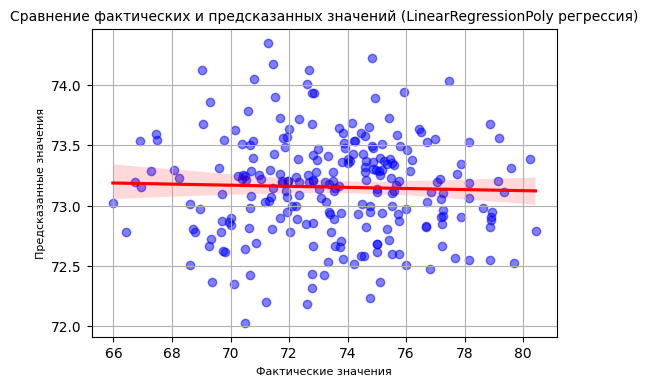

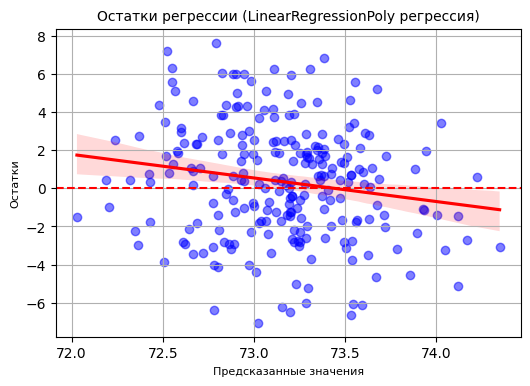

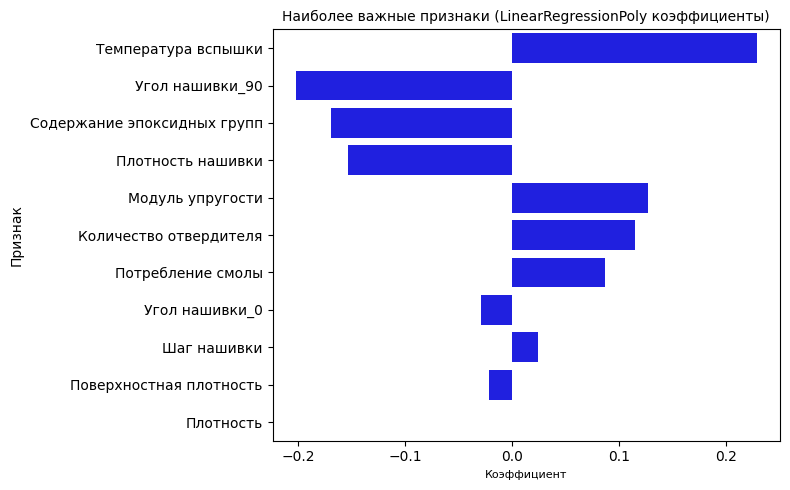

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
 
# Разделение на обучающую и тестовую выборки
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.3, random_state=1101)
 
# Определение числовых и категориальных столбцов
numeric_features = X.select_dtypes(include=['float64']).columns
categorical_features = X.select_dtypes(include=['category']).columns
 
# Создание преобразователей для числовых и категориальных данных
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

# Объединение преобразований в ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])
 
# Создание пайплана для модели
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures()),
    ('model', LinearRegression())
])
 
# Параметры для Grid Search
param_grid = {
    'poly__degree': [1, 2, 3],
    'poly__include_bias': [True, False]
}
 
# Настройка GridSearchCV с перекрёстной проверкой
grid_search = GridSearchCV(pipeline, param_grid, cv=10, 
                          scoring='neg_mean_squared_error',
                          return_train_score=True, n_jobs=-1)
 
# Обучение модели с поиском по сетке
grid_search.fit(X_train, y2_train)
 
# Вывод лучших параметров
print("Лучшие параметры:", grid_search.best_params_)
print("Лучшее MSE (на кросс-валидации):", -grid_search.best_score_)
 
# Предсказание на тестовой выборке
y_pred = grid_search.predict(X_test)
 
# Вычисление метрик качества
r2 = r2_score(y2_test, y_pred) * -1
max_err = max_error(y2_test, y_pred)
mse = mean_squared_error(y2_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y2_test, y_pred)
mape = mean_absolute_percentage_error(y2_test, y_pred)

# Создание датафрейма с метриками
metrics_LinearRegressionPoly = pd.DataFrame({
    'Метрика': ['R2', 'Max Error', 'MSE', 'RMSE', 'MAE', 'MAPE (%)'],
    'Значение LinearRegressionPoly': [r2, max_err, mse, rmse, mae, mape]
})
  
# Вывод метрик качества
print("\nМетрики качества на тестовой выборке:")
print(f"R2: {r2:.3f}")
print(f"Max Error: {max_err:.1f}")
print(f"MSE: {mse:.1f}")
print(f"RMSE: {rmse:.1f}")
print(f"MAE: {mae:.1f}")
print(f"MAPE: {mape:.2f}%")
 
# Визуализация результатов
plt.figure(figsize=(6, 4))
sns.regplot(x=y2_test, y=y_pred, color='blue', line_kws={'color': 'red'}, scatter_kws={'alpha':0.5})
plt.xlabel('Фактические значения', fontsize = 8)
plt.ylabel('Предсказанные значения', fontsize = 8)
plt.title('Сравнение фактических и предсказанных значений (LinearRegressionPoly регрессия)', fontsize = 10)
plt.grid(True)
plt.show()
 
# Визуализация остатков регрессии
residuals = y2_test['Модуль упругости при растяжении'] - y_pred.squeeze()
plt.figure(figsize=(6, 4))
sns.regplot(x=y_pred, y=residuals, color='blue', line_kws={'color': 'red'}, scatter_kws={'alpha':0.5})
#sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Предсказанные значения', fontsize = 8)
plt.ylabel('Остатки', fontsize = 8)
plt.title('Остатки регрессии (LinearRegressionPoly регрессия)', fontsize = 10)
plt.grid(True)
plt.show()
 
# Важность признаков для модели
# Получение имен признаков после OneHotEncoding
feature_names = (list(numeric_features) + 
                 list(grid_search.best_estimator_.named_steps['preprocessor']
                      .named_transformers_['cat']
                      .named_steps['onehot']
                      .get_feature_names_out(categorical_features)))
 
# Создание DataFrame с коэффициентами
coef_LinearRegressionPoly = pd.DataFrame({
    'Признак': pd.Series(feature_names),
    'Коэффициент': pd.Series(grid_search.best_estimator_.named_steps['model'].coef_.squeeze())
}).sort_values('Коэффициент', key=abs, ascending=False)

# Визуализация важности признаков
plt.figure(figsize=(8, 5))
sns.barplot(data=coef_LinearRegressionPoly.head(20), x='Коэффициент', y='Признак', color='blue')
plt.title('Наиболее важные признаки (LinearRegressionPoly коэффициенты)', fontsize = 10)
plt.xlabel('Коэффициент', fontsize = 8)
plt.tight_layout()
plt.show()


Лучшие параметры: {'model__n_neighbors': 12, 'model__p': 2, 'model__weights': 'uniform'}
Лучшее MSE (на кросс-валидации): 9.46981091484722

Метрики качества на тестовой выборке:
R2: 0.061
Max Error: 8.2
MSE: 9.2
RMSE: 3.0
MAE: 2.5
MAPE: 0.03%


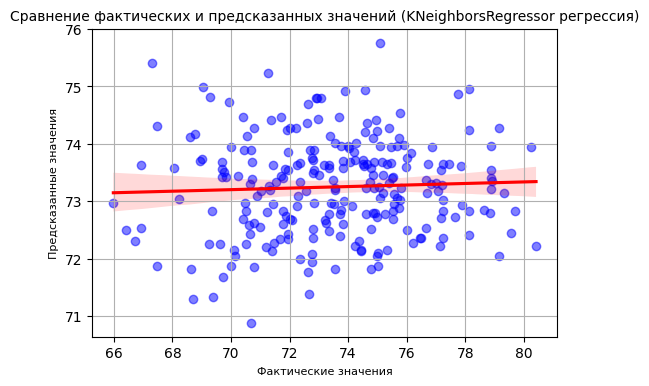

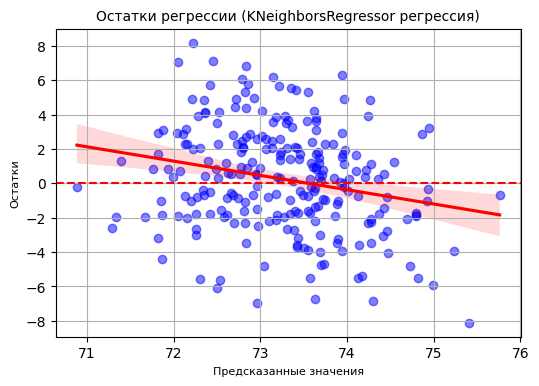

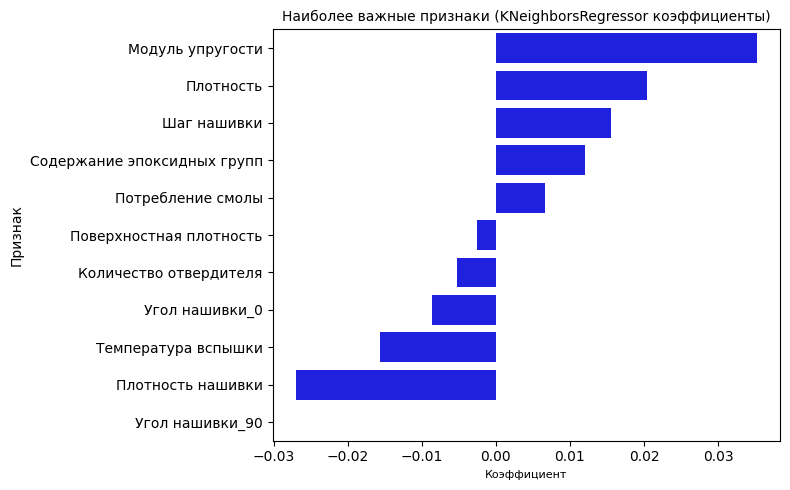

In [30]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
 
# Разделение на обучающую и тестовую выборки
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.3, random_state=1101)
 
# Определение числовых и категориальных столбцов
numeric_features = X.select_dtypes(include=['float64']).columns
categorical_features = X.select_dtypes(include=['category']).columns
 
# Создание преобразователей для числовых и категориальных данных
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

# Объединение преобразований в ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])
 
# Создание пайплана для модели
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', KNeighborsRegressor())
])
 
# Параметры для Grid Search
param_grid = {
    'model__n_neighbors': range(3, 15),
    'model__weights': ['uniform', 'distance'],
    'model__p': [1, 2]
}
 
# Настройка GridSearchCV с перекрёстной проверкой
grid_search = GridSearchCV(pipeline, param_grid, cv=10, 
                          scoring='neg_mean_squared_error',
                          return_train_score=True, n_jobs=-1)
 
# Обучение модели с поиском по сетке
grid_search.fit(X_train, y2_train)

# Лучшая модель
best_model = grid_search.best_estimator_

# Вывод лучших параметров
print("Лучшие параметры:", grid_search.best_params_)
print("Лучшее MSE (на кросс-валидации):", -grid_search.best_score_)
 
# Предсказание на тестовой выборке
y_pred = grid_search.predict(X_test)
 
# Вычисление метрик качества
r2 = r2_score(y2_test, y_pred) * -1
max_err = max_error(y2_test, y_pred)
mse = mean_squared_error(y2_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y2_test, y_pred)
mape = mean_absolute_percentage_error(y2_test, y_pred)

# Создание датафрейма с метриками
metrics_KNeighborsRegressor = pd.DataFrame({
    'Метрика': ['R2', 'Max Error', 'MSE', 'RMSE', 'MAE', 'MAPE (%)'],
    'Значение KNeighborsRegressor': [r2, max_err, mse, rmse, mae, mape]
})
  
# Вывод метрик качества
print("\nМетрики качества на тестовой выборке:")
print(f"R2: {r2:.3f}")
print(f"Max Error: {max_err:.1f}")
print(f"MSE: {mse:.1f}")
print(f"RMSE: {rmse:.1f}")
print(f"MAE: {mae:.1f}")
print(f"MAPE: {mape:.2f}%")
 
# Визуализация результатов
plt.figure(figsize=(6, 4))
sns.regplot(x=y2_test, y=y_pred, color='blue', line_kws={'color': 'red'}, scatter_kws={'alpha':0.5})
plt.xlabel('Фактические значения', fontsize = 8)
plt.ylabel('Предсказанные значения', fontsize = 8)
plt.title('Сравнение фактических и предсказанных значений (KNeighborsRegressor регрессия)', fontsize = 10)
plt.grid(True)
plt.show()
 
# Визуализация остатков регрессии
residuals = y2_test['Модуль упругости при растяжении'] - y_pred.squeeze()
plt.figure(figsize=(6, 4))
sns.regplot(x=y_pred, y=residuals, color='blue', line_kws={'color': 'red'}, scatter_kws={'alpha':0.5})
#sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Предсказанные значения', fontsize = 8)
plt.ylabel('Остатки', fontsize = 8)
plt.title('Остатки регрессии (KNeighborsRegressor регрессия)', fontsize = 10)
plt.grid(True)
plt.show()
 
# Для KNeighborsRegressor можно получить важность признаков
 
perm_importance_KNeighborsRegressor = permutation_importance(
    best_model, X_test, y2_test, n_repeats=10, random_state=1101
)
 
# Определяем максимальную длину
max_len = max(len(feature_names), len(perm_importance_KNeighborsRegressor.importances_mean))
 
# Создаем словарь с дополненными массивами
importance_KNeighborsRegressor = pd.DataFrame({
    'Признак': np.pad(feature_names, (0, max_len - len(feature_names)), constant_values=np.nan),
    'Коэффициент': np.pad(perm_importance_KNeighborsRegressor.importances_mean, (0, max_len - len(perm_importance_KNeighborsRegressor.importances_mean)), constant_values=np.nan)
}).sort_values('Коэффициент', ascending=False)
 
# Визуализация важности признаков
plt.figure(figsize=(8, 5))
sns.barplot(data=importance_KNeighborsRegressor.head(20), x='Коэффициент', y='Признак', color='blue')
plt.title('Наиболее важные признаки (KNeighborsRegressor коэффициенты)', fontsize = 10)
plt.xlabel('Коэффициент', fontsize = 8)
plt.tight_layout()
plt.show()

Лучшие параметры: {'model__alpha_1': 1e-06, 'model__alpha_2': 0.0001, 'model__lambda_1': 1e-06, 'model__lambda_2': 0.0001}
Лучшее MSE (на кросс-валидации): 9.08444557882665

Метрики качества на тестовой выборке:
R2: 0.016
Max Error: 7.3
MSE: 8.9
RMSE: 3.0
MAE: 2.4
MAPE: 0.03%


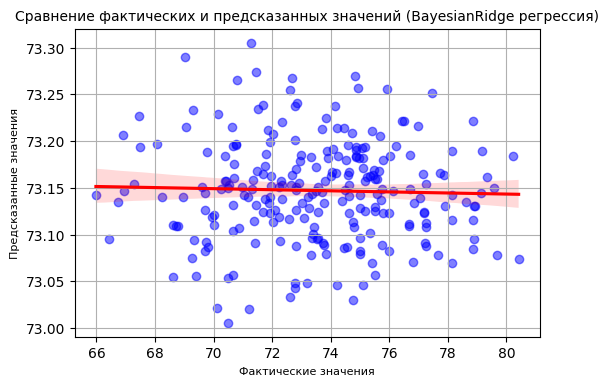

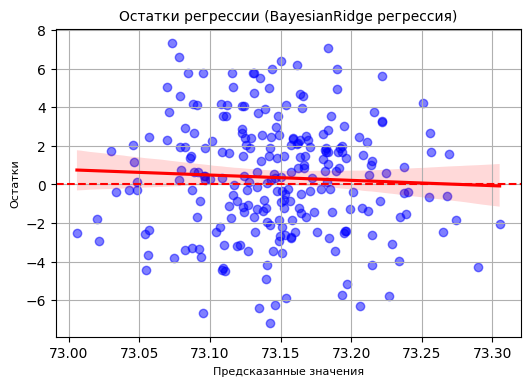

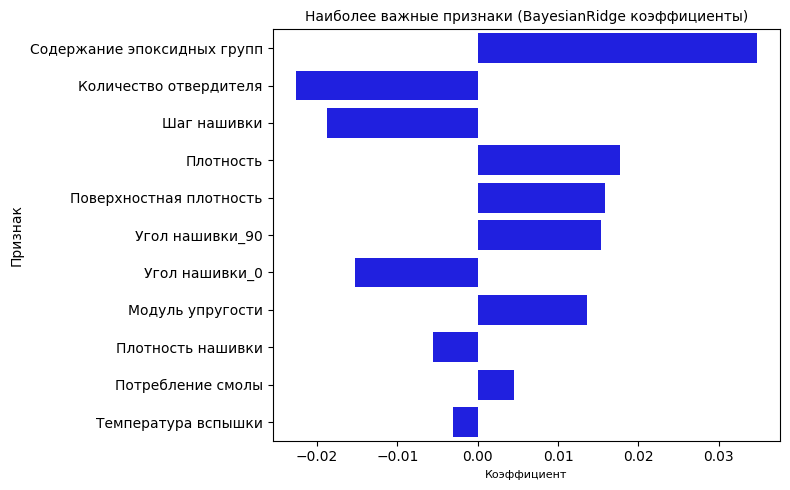

In [31]:
from sklearn.linear_model import BayesianRidge
 
# Разделение на обучающую и тестовую выборки
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.3, random_state=1101)
 
# Определение числовых и категориальных столбцов
numeric_features = X.select_dtypes(include=['float64']).columns
categorical_features = X.select_dtypes(include=['category']).columns
 
# Создание преобразователей для числовых и категориальных данных
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

# Объединение преобразований в ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])
 
# Создание пайплана для модели
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', BayesianRidge())
])
 
# Параметры для Grid Search
param_grid = {
    'model__alpha_1': [1e-6, 1e-5, 1e-4],
    'model__alpha_2': [1e-6, 1e-5, 1e-4],
    'model__lambda_1': [1e-6, 1e-5, 1e-4],
    'model__lambda_2': [1e-6, 1e-5, 1e-4]
}
 
# Настройка GridSearchCV с перекрёстной проверкой
grid_search = GridSearchCV(pipeline, param_grid, cv=10, 
                          scoring='neg_mean_squared_error',
                          return_train_score=True, n_jobs=-1)
 
# Обучение модели с поиском по сетке
grid_search.fit(X_train, y2_train)
 
# Вывод лучших параметров
print("Лучшие параметры:", grid_search.best_params_)
print("Лучшее MSE (на кросс-валидации):", -grid_search.best_score_)
 
# Предсказание на тестовой выборке
y_pred = grid_search.predict(X_test)
 
# Вычисление метрик качества
r2 = r2_score(y2_test, y_pred) * -1
max_err = max_error(y2_test, y_pred)
mse = mean_squared_error(y2_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y2_test, y_pred)
mape = mean_absolute_percentage_error(y2_test, y_pred)

# Создание датафрейма с метриками
metrics_BayesianRidge = pd.DataFrame({
    'Метрика': ['R2', 'Max Error', 'MSE', 'RMSE', 'MAE', 'MAPE (%)'],
    'Значение BayesianRidge': [r2, max_err, mse, rmse, mae, mape]
})
  
# Вывод метрик качества
print("\nМетрики качества на тестовой выборке:")
print(f"R2: {r2:.3f}")
print(f"Max Error: {max_err:.1f}")
print(f"MSE: {mse:.1f}")
print(f"RMSE: {rmse:.1f}")
print(f"MAE: {mae:.1f}")
print(f"MAPE: {mape:.2f}%")
 
# Визуализация результатов
plt.figure(figsize=(6, 4))
sns.regplot(x=y2_test, y=y_pred, color='blue', line_kws={'color': 'red'}, scatter_kws={'alpha':0.5})
plt.xlabel('Фактические значения', fontsize = 8)
plt.ylabel('Предсказанные значения', fontsize = 8)
plt.title('Сравнение фактических и предсказанных значений (BayesianRidge регрессия)', fontsize = 10)
plt.grid(True)
plt.show()
 
# Визуализация остатков регрессии
residuals = y2_test['Модуль упругости при растяжении'] - y_pred
plt.figure(figsize=(6, 4))
sns.regplot(x=y_pred, y=residuals, color='blue', line_kws={'color': 'red'}, scatter_kws={'alpha':0.5})
#sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Предсказанные значения', fontsize = 8)
plt.ylabel('Остатки', fontsize = 8)
plt.title('Остатки регрессии (BayesianRidge регрессия)', fontsize = 10)
plt.grid(True)
plt.show()
 
# Важность признаков для модели
# Получение имен признаков после OneHotEncoding
feature_names = (list(numeric_features) + 
                 list(grid_search.best_estimator_.named_steps['preprocessor']
                      .named_transformers_['cat']
                      .named_steps['onehot']
                      .get_feature_names_out(categorical_features)))
 
# Создание DataFrame с коэффициентами
coef_BayesianRidge = pd.DataFrame({
    'Признак': feature_names,
    'Коэффициент': grid_search.best_estimator_.named_steps['model'].coef_
}).sort_values('Коэффициент', key=abs, ascending=False)
 
# Визуализация важности признаков
plt.figure(figsize=(8, 5))
sns.barplot(data=coef_BayesianRidge.head(20), x='Коэффициент', y='Признак', color='blue')
plt.title('Наиболее важные признаки (BayesianRidge коэффициенты)', fontsize = 10)
plt.xlabel('Коэффициент', fontsize = 8)
plt.tight_layout()
plt.show()


Fitting 10 folds for each of 135 candidates, totalling 1350 fits
Лучшие параметры: {'model__max_depth': 3, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 2, 'model__min_samples_split': 10}
Лучшее MSE (на кросс-валидации): 10.302014489169046

Метрики качества на тестовой выборке:
R2: 0.021
Max Error: 7.3
MSE: 8.9
RMSE: 3.0
MAE: 2.4
MAPE: 0.03%


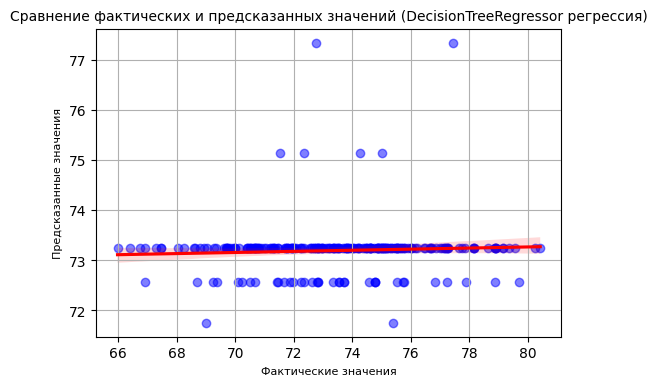

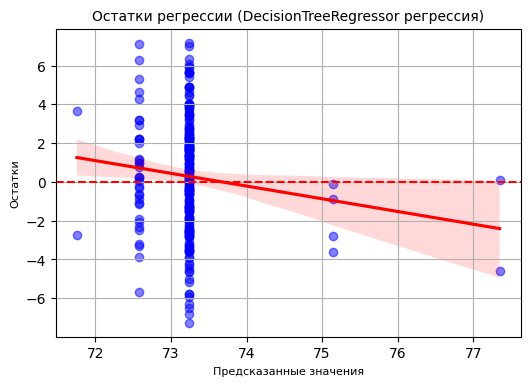

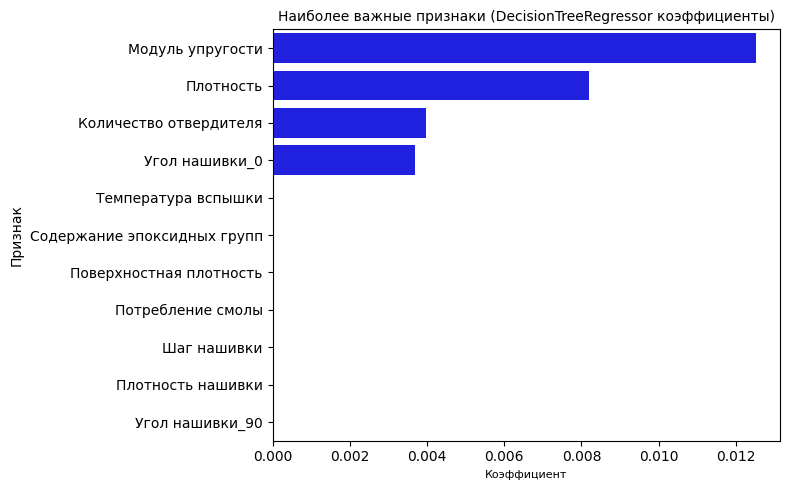

In [32]:
from sklearn.tree import DecisionTreeRegressor
 
# Разделение на обучающую и тестовую выборки
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.3, random_state=1101)
 
# Определение числовых и категориальных столбцов
numeric_features = X.select_dtypes(include=['float64']).columns
categorical_features = X.select_dtypes(include=['category']).columns
 
# Создание преобразователей для числовых и категориальных данных
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

# Объединение преобразований в ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])
 
# Создание пайплана для модели
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DecisionTreeRegressor(random_state=1101))
])
 
# Параметры для Grid Search
param_grid = {
    'model__max_depth': [3, 5, 7, 10, None],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__max_features': ['auto', 'sqrt', 'log2']
}
 
# Настройка GridSearchCV с перекрёстной проверкой
grid_search = GridSearchCV(pipeline, param_grid, cv=10, 
                          scoring='neg_mean_squared_error',
                          return_train_score=True, n_jobs=-1, verbose=1)
 
# Обучение модели с поиском по сетке
grid_search.fit(X_train, y2_train)

# Лучшая модель
best_model = grid_search.best_estimator_
 
# Вывод лучших параметров
print("Лучшие параметры:", grid_search.best_params_)
print("Лучшее MSE (на кросс-валидации):", -grid_search.best_score_)
 
# Предсказание на тестовой выборке
y_pred = grid_search.predict(X_test)
 
# Вычисление метрик качества
r2 = r2_score(y2_test, y_pred) * -1
max_err = max_error(y2_test, y_pred)
mse = mean_squared_error(y2_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y2_test, y_pred)
mape = mean_absolute_percentage_error(y2_test, y_pred)

# Создание датафрейма с метриками
metrics_DecisionTreeRegressor = pd.DataFrame({
    'Метрика': ['R2', 'Max Error', 'MSE', 'RMSE', 'MAE', 'MAPE (%)'],
    'Значение DecisionTreeRegressor': [r2, max_err, mse, rmse, mae, mape]
})
  
# Вывод метрик качества
print("\nМетрики качества на тестовой выборке:")
print(f"R2: {r2:.3f}")
print(f"Max Error: {max_err:.1f}")
print(f"MSE: {mse:.1f}")
print(f"RMSE: {rmse:.1f}")
print(f"MAE: {mae:.1f}")
print(f"MAPE: {mape:.2f}%")
 
# Визуализация результатов
plt.figure(figsize=(6, 4))
sns.regplot(x=y2_test, y=y_pred, color='blue', line_kws={'color': 'red'}, scatter_kws={'alpha':0.5})
plt.xlabel('Фактические значения', fontsize = 8)
plt.ylabel('Предсказанные значения', fontsize = 8)
plt.title('Сравнение фактических и предсказанных значений (DecisionTreeRegressor регрессия)', fontsize = 10)
plt.grid(True)
plt.show()
 
# Визуализация остатков регрессии
residuals = y2_test['Модуль упругости при растяжении'] - y_pred
plt.figure(figsize=(6, 4))
sns.regplot(x=y_pred, y=residuals, color='blue', line_kws={'color': 'red'}, scatter_kws={'alpha':0.5})
#sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Предсказанные значения', fontsize = 8)
plt.ylabel('Остатки', fontsize = 8)
plt.title('Остатки регрессии (DecisionTreeRegressor регрессия)', fontsize = 10)
plt.grid(True)
plt.show()
 
# Важность признаков для модели
# Получение имен признаков после OneHotEncoding
feature_names = (list(numeric_features) + 
                 list(grid_search.best_estimator_.named_steps['preprocessor']
                      .named_transformers_['cat']
                      .named_steps['onehot']
                      .get_feature_names_out(categorical_features)))
 
# Для DecisionTreeRegressor можно получить важность признаков
perm_importance_DecisionTreeRegressor = permutation_importance(
    best_model, X_test, y2_test, n_repeats=10, random_state=1101
)
 
# Определяем максимальную длину
max_len = max(len(feature_names), len(perm_importance_DecisionTreeRegressor.importances_mean))
 
# Создаем словарь с дополненными массивами
importance_DecisionTreeRegressor = pd.DataFrame({
    'Признак': np.pad(feature_names, (0, max_len - len(feature_names)), constant_values=np.nan),
    'Коэффициент': np.pad(perm_importance_DecisionTreeRegressor.importances_mean, (0, max_len - len(perm_importance_DecisionTreeRegressor.importances_mean)), constant_values=np.nan)
}).sort_values('Коэффициент', ascending=False)
 
# Визуализация важности признаков
plt.figure(figsize=(8, 5))
sns.barplot(data=importance_DecisionTreeRegressor.head(20), x='Коэффициент', y='Признак', color='blue')
plt.title('Наиболее важные признаки (DecisionTreeRegressor коэффициенты)', fontsize = 10)
plt.xlabel('Коэффициент', fontsize = 8)
plt.tight_layout()
plt.show()

Fitting 10 folds for each of 24 candidates, totalling 240 fits
Лучшие параметры: {'model__max_depth': 20, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 200}
Лучшее MSE (на кросс-валидации): 9.405796499081628

Метрики качества на тестовой выборке:
R2: 0.045
Max Error: 7.6
MSE: 9.1
RMSE: 3.0
MAE: 2.4
MAPE: 0.03%


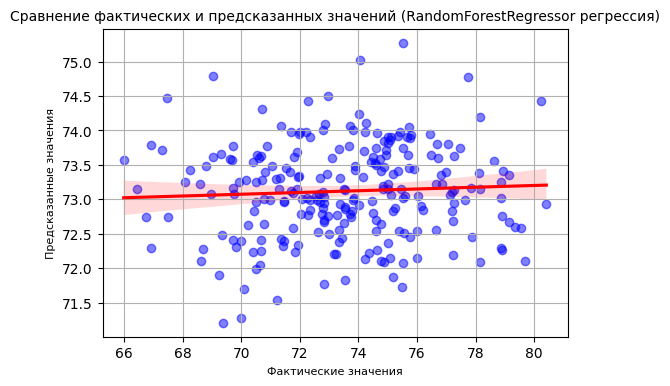

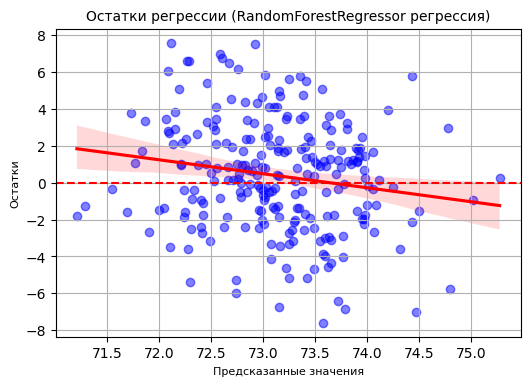

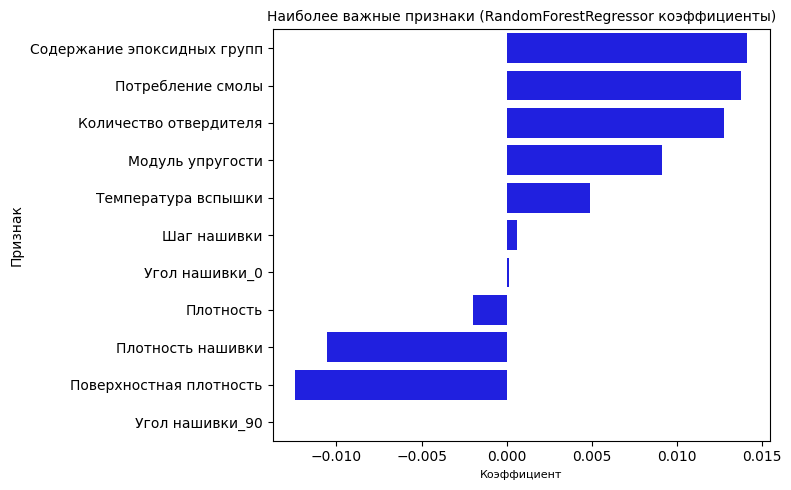

In [33]:
from sklearn.ensemble import RandomForestRegressor
 
# Разделение на обучающую и тестовую выборки
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.3, random_state=1101)
 
# Определение числовых и категориальных столбцов
numeric_features = X.select_dtypes(include=['float64']).columns
categorical_features = X.select_dtypes(include=['category']).columns
 
# Создание преобразователей для числовых и категориальных данных
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

# Объединение преобразований в ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])
 
# Создание пайплана для модели
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=1101))
])
 
# Параметры для Grid Search
param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2]
}
 
# Настройка GridSearchCV с перекрёстной проверкой
grid_search = GridSearchCV(pipeline, param_grid, cv=10, 
                          scoring='neg_mean_squared_error',
                          return_train_score=True, n_jobs=-1, verbose=1)
 
# Обучение модели с поиском по сетке
grid_search.fit(X_train, y2_train)

# Лучшая модель
best_model = grid_search.best_estimator_
 
# Вывод лучших параметров
print("Лучшие параметры:", grid_search.best_params_)
print("Лучшее MSE (на кросс-валидации):", -grid_search.best_score_)
 
# Предсказание на тестовой выборке
y_pred = grid_search.predict(X_test)
 
# Вычисление метрик качества
r2 = r2_score(y2_test, y_pred) * -1
max_err = max_error(y2_test, y_pred)
mse = mean_squared_error(y2_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y2_test, y_pred)
mape = mean_absolute_percentage_error(y2_test, y_pred)

# Создание датафрейма с метриками
metrics_RandomForestRegressor = pd.DataFrame({
    'Метрика': ['R2', 'Max Error', 'MSE', 'RMSE', 'MAE', 'MAPE (%)'],
    'Значение RandomForestRegressor': [r2, max_err, mse, rmse, mae, mape]
})
  
# Вывод метрик качества
print("\nМетрики качества на тестовой выборке:")
print(f"R2: {r2:.3f}")
print(f"Max Error: {max_err:.1f}")
print(f"MSE: {mse:.1f}")
print(f"RMSE: {rmse:.1f}")
print(f"MAE: {mae:.1f}")
print(f"MAPE: {mape:.2f}%")
 
# Визуализация результатов
plt.figure(figsize=(6, 4))
sns.regplot(x=y2_test, y=y_pred, color='blue', line_kws={'color': 'red'}, scatter_kws={'alpha':0.5})
plt.xlabel('Фактические значения', fontsize = 8)
plt.ylabel('Предсказанные значения', fontsize = 8)
plt.title('Сравнение фактических и предсказанных значений (RandomForestRegressor регрессия)', fontsize = 10)
plt.grid(True)
plt.show()
 
# Визуализация остатков регрессии
residuals = y2_test['Модуль упругости при растяжении'] - y_pred
plt.figure(figsize=(6, 4))
sns.regplot(x=y_pred, y=residuals, color='blue', line_kws={'color': 'red'}, scatter_kws={'alpha':0.5})
#sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Предсказанные значения', fontsize = 8)
plt.ylabel('Остатки', fontsize = 8)
plt.title('Остатки регрессии (RandomForestRegressor регрессия)', fontsize = 10)
plt.grid(True)
plt.show()
 
# Важность признаков для модели
# Получение имен признаков после OneHotEncoding
feature_names = (list(numeric_features) + 
                 list(grid_search.best_estimator_.named_steps['preprocessor']
                      .named_transformers_['cat']
                      .named_steps['onehot']
                      .get_feature_names_out(categorical_features)))
 
# Для RandomForestRegressor можно получить важность признаков
perm_importance_RandomForestRegressor = permutation_importance(
    best_model, X_test, y2_test, n_repeats=10, random_state=1101
)
 
# Определяем максимальную длину
max_len = max(len(feature_names), len(perm_importance_RandomForestRegressor.importances_mean))
 
# Создаем словарь с дополненными массивами
importance_RandomForestRegressor = pd.DataFrame({
    'Признак': np.pad(feature_names, (0, max_len - len(feature_names)), constant_values=np.nan),
    'Коэффициент': np.pad(perm_importance_RandomForestRegressor.importances_mean, (0, max_len - len(perm_importance_RandomForestRegressor.importances_mean)), constant_values=np.nan)
}).sort_values('Коэффициент', ascending=False)
 
# Визуализация важности признаков
plt.figure(figsize=(8, 5))
sns.barplot(data=importance_RandomForestRegressor.head(20), x='Коэффициент', y='Признак', color='blue')
plt.title('Наиболее важные признаки (RandomForestRegressor коэффициенты)', fontsize = 10)
plt.xlabel('Коэффициент', fontsize = 8)
plt.tight_layout()
plt.show()

Лучшие параметры: {'model__C': 0.1, 'model__gamma': 'scale', 'model__kernel': 'linear'}
Лучшее MSE (на кросс-валидации): 9.313504828363843

Метрики качества на тестовой выборке:
R2: 0.045
Max Error: 7.9
MSE: 9.1
RMSE: 3.0
MAE: 2.5
MAPE: 0.03%


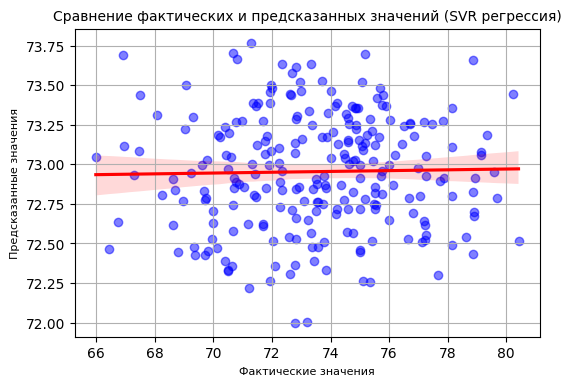

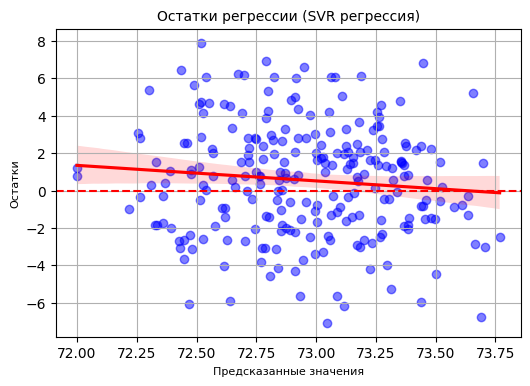

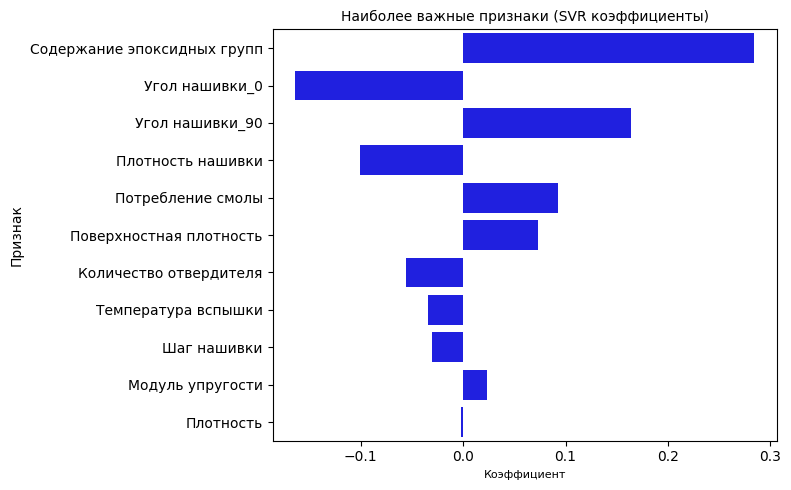

In [35]:
from sklearn.svm import SVR
 
# Разделение на обучающую и тестовую выборки
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.3, random_state=1101)
 
# Определение числовых и категориальных столбцов
numeric_features = X.select_dtypes(include=['float64']).columns
categorical_features = X.select_dtypes(include=['category']).columns
 
# Создание преобразователей для числовых и категориальных данных
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

# Объединение преобразований в ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])
 
# Создание пайплана для модели
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', SVR())
])
 
# Параметры для Grid Search
param_grid = {
    'model__C': [0.1, 1, 10],
    'model__kernel': ['linear'],
    'model__gamma': ['scale', 'auto']
}
 
# Настройка GridSearchCV с перекрёстной проверкой
grid_search = GridSearchCV(pipeline, param_grid, cv=10, 
                          scoring='neg_mean_squared_error',
                          return_train_score=True, n_jobs=-1)
 
# Обучение модели с поиском по сетке
grid_search.fit(X_train, y2_train)
 
# Вывод лучших параметров
print("Лучшие параметры:", grid_search.best_params_)
print("Лучшее MSE (на кросс-валидации):", -grid_search.best_score_)
 
# Предсказание на тестовой выборке
y_pred = grid_search.predict(X_test)
 
# Вычисление метрик качества
r2 = r2_score(y2_test, y_pred) * -1
max_err = max_error(y2_test, y_pred)
mse = mean_squared_error(y2_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y2_test, y_pred)
mape = mean_absolute_percentage_error(y2_test, y_pred)

# Создание датафрейма с метриками
metrics_SVR = pd.DataFrame({
    'Метрика': ['R2', 'Max Error', 'MSE', 'RMSE', 'MAE', 'MAPE (%)'],
    'Значение SVR': [r2, max_err, mse, rmse, mae, mape]
})
  
# Вывод метрик качества
print("\nМетрики качества на тестовой выборке:")
print(f"R2: {r2:.3f}")
print(f"Max Error: {max_err:.1f}")
print(f"MSE: {mse:.1f}")
print(f"RMSE: {rmse:.1f}")
print(f"MAE: {mae:.1f}")
print(f"MAPE: {mape:.2f}%")
 
# Визуализация результатов
plt.figure(figsize=(6, 4))
sns.regplot(x=y2_test, y=y_pred, color='blue', line_kws={'color': 'red'}, scatter_kws={'alpha':0.5})
plt.xlabel('Фактические значения', fontsize = 8)
plt.ylabel('Предсказанные значения', fontsize = 8)
plt.title('Сравнение фактических и предсказанных значений (SVR регрессия)', fontsize = 10)
plt.grid(True)
plt.show()
 
# Визуализация остатков регрессии
residuals = y2_test['Модуль упругости при растяжении'] - y_pred
plt.figure(figsize=(6, 4))
sns.regplot(x=y_pred, y=residuals, color='blue', line_kws={'color': 'red'}, scatter_kws={'alpha':0.5})
#sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Предсказанные значения', fontsize = 8)
plt.ylabel('Остатки', fontsize = 8)
plt.title('Остатки регрессии (SVR регрессия)', fontsize = 10)
plt.grid(True)
plt.show()
 
# Важность признаков для модели
# Получение имен признаков после OneHotEncoding
feature_names = (list(numeric_features) + 
                 list(grid_search.best_estimator_.named_steps['preprocessor']
                      .named_transformers_['cat']
                      .named_steps['onehot']
                      .get_feature_names_out(categorical_features)))
 
# Создание DataFrame с коэффициентами
coef_SVR = pd.DataFrame({
    'Признак': feature_names,
    'Коэффициент': grid_search.best_estimator_.named_steps['model'].coef_.squeeze()
}).sort_values('Коэффициент', key=abs, ascending=False)
 
# Визуализация важности признаков
plt.figure(figsize=(8, 5))
sns.barplot(data=coef_SVR.head(20), x='Коэффициент', y='Признак', color='blue')
plt.title('Наиболее важные признаки (SVR коэффициенты)', fontsize = 10)
plt.xlabel('Коэффициент', fontsize = 8)
plt.tight_layout()
plt.show()


Лучшие параметры: {'model__activation': 'tanh', 'model__alpha': 0.01, 'model__hidden_layer_sizes': (50, 50), 'model__learning_rate_init': 0.01}
Лучшее MSE (на кросс-валидации): 9.051042436201616

Метрики качества на тестовой выборке:
R2: 0.015
Max Error: 7.3
MSE: 8.8
RMSE: 3.0
MAE: 2.4
MAPE: 0.03%


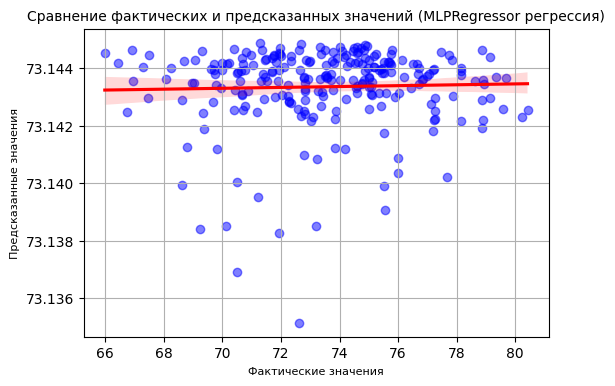

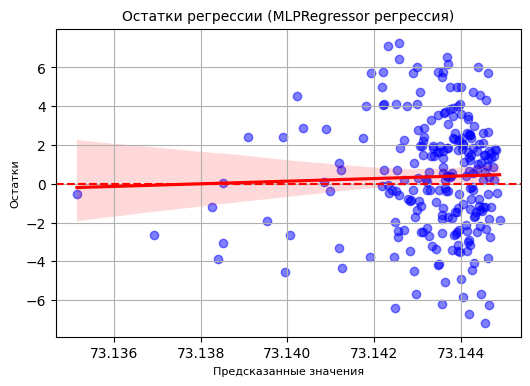

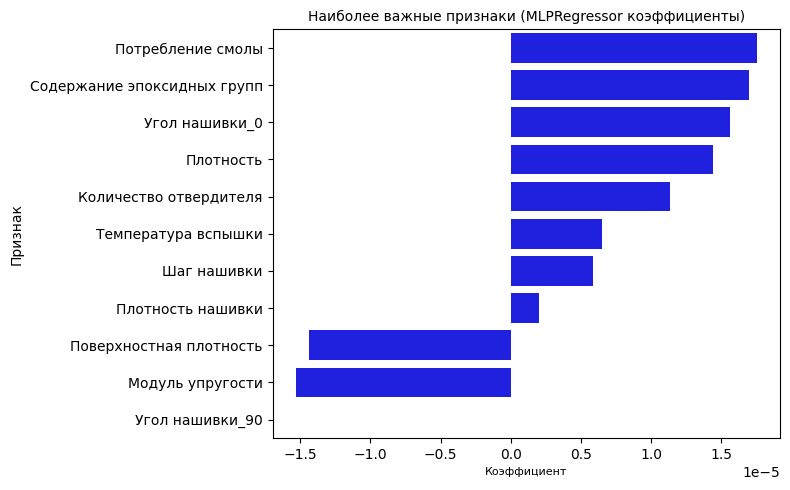

In [36]:
from sklearn.neural_network import MLPRegressor
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
 
# Разделение на обучающую и тестовую выборки
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.3, random_state=1101)
 
# Определение числовых и категориальных столбцов
numeric_features = X.select_dtypes(include=['float64']).columns
categorical_features = X.select_dtypes(include=['category']).columns
 
# Создание преобразователей для числовых и категориальных данных
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant')),
    ('onehot', OneHotEncoder())
])

# Объединение преобразований в ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])
 
# Создание пайплана для модели
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', MLPRegressor(max_iter=1000, random_state=1101))
])
 
# Параметры для Grid Search
param_grid = {
    'model__hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'model__activation': ['relu', 'tanh'],
    'model__alpha': [0.0001, 0.001, 0.01],
    'model__learning_rate_init': [0.001, 0.01]
}
 
# Настройка GridSearchCV с перекрёстной проверкой
grid_search = GridSearchCV(pipeline, param_grid, cv=10, 
                          scoring='neg_mean_squared_error',
                          return_train_score=True, n_jobs=-1)
 
# Обучение модели с поиском по сетке
grid_search.fit(X_train, y2_train)

# Лучшая модель
best_model = grid_search.best_estimator_
 
# Вывод лучших параметров
print("Лучшие параметры:", grid_search.best_params_)
print("Лучшее MSE (на кросс-валидации):", -grid_search.best_score_)
 
# Предсказание на тестовой выборке
y_pred = grid_search.predict(X_test)
 
# Вычисление метрик качества
r2 = r2_score(y2_test, y_pred) * -1
max_err = max_error(y2_test, y_pred)
mse = mean_squared_error(y2_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y2_test, y_pred)
mape = mean_absolute_percentage_error(y2_test, y_pred)

# Создание датафрейма с метриками
metrics_MLPRegressor = pd.DataFrame({
    'Метрика': ['R2', 'Max Error', 'MSE', 'RMSE', 'MAE', 'MAPE (%)'],
    'Значение MLPRegressor': [r2, max_err, mse, rmse, mae, mape]
})
  
# Вывод метрик качества
print("\nМетрики качества на тестовой выборке:")
print(f"R2: {r2:.3f}")
print(f"Max Error: {max_err:.1f}")
print(f"MSE: {mse:.1f}")
print(f"RMSE: {rmse:.1f}")
print(f"MAE: {mae:.1f}")
print(f"MAPE: {mape:.2f}%")
 
# Визуализация результатов
plt.figure(figsize=(6, 4))
sns.regplot(x=y2_test, y=y_pred, color='blue', line_kws={'color': 'red'}, scatter_kws={'alpha':0.5})
plt.xlabel('Фактические значения', fontsize = 8)
plt.ylabel('Предсказанные значения', fontsize = 8)
plt.title('Сравнение фактических и предсказанных значений (MLPRegressor регрессия)', fontsize = 10)
plt.grid(True)
plt.show()
 
# Визуализация остатков регрессии
residuals = y2_test['Модуль упругости при растяжении'] - y_pred
plt.figure(figsize=(6, 4))
sns.regplot(x=y_pred, y=residuals, color='blue', line_kws={'color': 'red'}, scatter_kws={'alpha':0.5})
#sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Предсказанные значения', fontsize = 8)
plt.ylabel('Остатки', fontsize = 8)
plt.title('Остатки регрессии (MLPRegressor регрессия)', fontsize = 10)
plt.grid(True)
plt.show()
 
# Важность признаков для модели
# Получение имен признаков после OneHotEncoding
feature_names = (list(numeric_features) + 
                 list(grid_search.best_estimator_.named_steps['preprocessor']
                      .named_transformers_['cat']
                      .named_steps['onehot']
                      .get_feature_names_out(categorical_features)))
 
# Для MLPRegressor можно получить важность признаков
perm_importance_MLPRegressor = permutation_importance(
    best_model, X_test, y2_test, n_repeats=10, random_state=1101
)
 
# Определяем максимальную длину
max_len = max(len(feature_names), len(perm_importance_MLPRegressor.importances_mean))
 
# Создаем словарь с дополненными массивами
importance_MLPRegressor = pd.DataFrame({
    'Признак': np.pad(feature_names, (0, max_len - len(feature_names)), constant_values=np.nan),
    'Коэффициент': np.pad(perm_importance_MLPRegressor.importances_mean, (0, max_len - len(perm_importance_MLPRegressor.importances_mean)), constant_values=np.nan)
}).sort_values('Коэффициент', ascending=False)
 
# Визуализация важности признаков
plt.figure(figsize=(8, 5))
sns.barplot(data=importance_MLPRegressor.head(20), x='Коэффициент', y='Признак', color='blue')
plt.title('Наиболее важные признаки (MLPRegressor коэффициенты)', fontsize = 10)
plt.xlabel('Коэффициент', fontsize = 8)
plt.tight_layout()
plt.show()


Лучшие параметры: {'model__learning_rate': 0.01, 'model__loss': 'linear', 'model__n_estimators': 200}
Лучшее MSE (на кросс-валидации): 9.16356369118962

Метрики качества на тестовой выборке:
R2: 0.016
Max Error: 7.3
MSE: 8.9
RMSE: 3.0
MAE: 2.4
MAPE: 0.03%


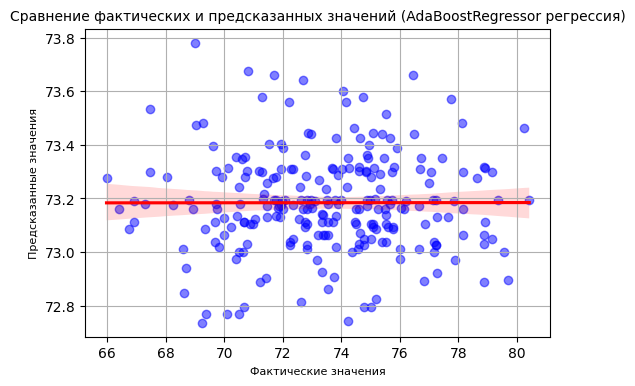

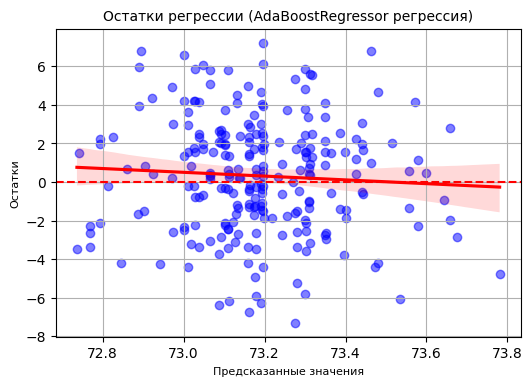

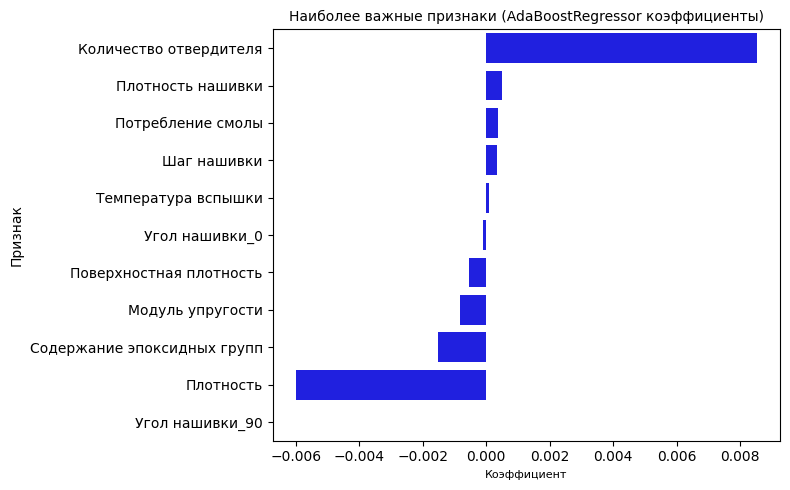

In [37]:
from sklearn.ensemble import AdaBoostRegressor
 
# Разделение на обучающую и тестовую выборки
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.3, random_state=1101)
 
# Определение числовых и категориальных столбцов
numeric_features = X.select_dtypes(include=['float64']).columns
categorical_features = X.select_dtypes(include=['category']).columns
 
# Создание преобразователей для числовых и категориальных данных
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

# Объединение преобразований в ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])
 
# Создание пайплана для модели
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', AdaBoostRegressor(random_state=1101))
])
 
# Параметры для Grid Search
param_grid = {
    'model__n_estimators': [50, 100, 200, 300],
    'model__learning_rate': [0.001, 0.01, 0.1, 0.5, 1.0],
    'model__loss': ['linear', 'square', 'exponential']
}
 
# Настройка GridSearchCV с перекрёстной проверкой
grid_search = GridSearchCV(pipeline, param_grid, cv=10, 
                          scoring='neg_mean_squared_error',
                          return_train_score=True, n_jobs=-1)
 
# Обучение модели с поиском по сетке
grid_search.fit(X_train, y2_train)

# Лучшая модель
best_model = grid_search.best_estimator_
 
# Вывод лучших параметров
print("Лучшие параметры:", grid_search.best_params_)
print("Лучшее MSE (на кросс-валидации):", -grid_search.best_score_)
 
# Предсказание на тестовой выборке
y_pred = grid_search.predict(X_test)
 
# Вычисление метрик качества
r2 = r2_score(y2_test, y_pred) * -1
max_err = max_error(y2_test, y_pred)
mse = mean_squared_error(y2_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y2_test, y_pred)
mape = mean_absolute_percentage_error(y2_test, y_pred)

# Создание датафрейма с метриками
metrics_AdaBoostRegressor = pd.DataFrame({
    'Метрика': ['R2', 'Max Error', 'MSE', 'RMSE', 'MAE', 'MAPE (%)'],
    'Значение AdaBoostRegressor': [r2, max_err, mse, rmse, mae, mape]
})
  
# Вывод метрик качества
print("\nМетрики качества на тестовой выборке:")
print(f"R2: {r2:.3f}")
print(f"Max Error: {max_err:.1f}")
print(f"MSE: {mse:.1f}")
print(f"RMSE: {rmse:.1f}")
print(f"MAE: {mae:.1f}")
print(f"MAPE: {mape:.2f}%")
 
# Визуализация результатов
plt.figure(figsize=(6, 4))
sns.regplot(x=y2_test, y=y_pred, color='blue', line_kws={'color': 'red'}, scatter_kws={'alpha':0.5})
plt.xlabel('Фактические значения', fontsize = 8)
plt.ylabel('Предсказанные значения', fontsize = 8)
plt.title('Сравнение фактических и предсказанных значений (AdaBoostRegressor регрессия)', fontsize = 10)
plt.grid(True)
plt.show()
 
# Визуализация остатков регрессии
residuals = y2_test['Модуль упругости при растяжении'] - y_pred
plt.figure(figsize=(6, 4))
sns.regplot(x=y_pred, y=residuals, color='blue', line_kws={'color': 'red'}, scatter_kws={'alpha':0.5})
#sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Предсказанные значения', fontsize = 8)
plt.ylabel('Остатки', fontsize = 8)
plt.title('Остатки регрессии (AdaBoostRegressor регрессия)', fontsize = 10)
plt.grid(True)
plt.show()
 
# Важность признаков для модели
# Получение имен признаков после OneHotEncoding
feature_names = (list(numeric_features) + 
                 list(grid_search.best_estimator_.named_steps['preprocessor']
                      .named_transformers_['cat']
                      .named_steps['onehot']
                      .get_feature_names_out(categorical_features)))
 
# Для AdaBoostRegressor можно получить важность признаков
perm_importance_AdaBoostRegressor = permutation_importance(
    best_model, X_test, y2_test, n_repeats=10, random_state=1101
)
 
# Определяем максимальную длину
max_len = max(len(feature_names), len(perm_importance_AdaBoostRegressor.importances_mean))
 
# Создаем словарь с дополненными массивами
importance_AdaBoostRegressor = pd.DataFrame({
    'Признак': np.pad(feature_names, (0, max_len - len(feature_names)), constant_values=np.nan),
    'Коэффициент': np.pad(perm_importance_AdaBoostRegressor.importances_mean, (0, max_len - len(perm_importance_AdaBoostRegressor.importances_mean)), constant_values=np.nan)
}).sort_values('Коэффициент', ascending=False)
 
# Визуализация важности признаков
plt.figure(figsize=(8, 5))
sns.barplot(data=importance_AdaBoostRegressor.head(20), x='Коэффициент', y='Признак', color='blue')
plt.title('Наиболее важные признаки (AdaBoostRegressor коэффициенты)', fontsize = 10)
plt.xlabel('Коэффициент', fontsize = 8)
plt.tight_layout()
plt.show()



In [38]:
# Для удобства оценки соберём датафреймы с метриками всех моделей в один
df_metrics_list = [metrics_LinearRegression, 
                metrics_Lasso,
                metrics_LassoCV,
                metrics_Ridge,
                metrics_ElasticNet,
                metrics_LinearRegressionPoly,
                metrics_KNeighborsRegressor,
                metrics_BayesianRidge,
                metrics_DecisionTreeRegressor,
                metrics_RandomForestRegressor,
                metrics_SVR,
                metrics_MLPRegressor,
                metrics_AdaBoostRegressor]
model_names = ['LinearRegression', 'Lasso', 'LassoCV',
         'Ridge', 'ElasticNet', 'LinearRegressionPoly',
         'KNeighborsRegressor', 'BayesianRidge', 'DecisionTreeRegressor',
         'RandomForestRegressor', 'SVR', 'MLPRegressor', 'AdaBoostRegressor']
 
metrics_model_y2 = df_metrics_list[0].iloc[:, [0]].copy()
metrics_model_y2.columns = ['parameter_name']
 
for index, df in enumerate(df_metrics_list):
    metrics_model_y2[model_names[index]] = df.iloc[:, 1]

metrics_model_y2.round(3)

,parameter_name,LinearRegression,Lasso,LassoCV,Ridge,ElasticNet,LinearRegressionPoly,KNeighborsRegressor,BayesianRidge,DecisionTreeRegressor,RandomForestRegressor,SVR,MLPRegressor,AdaBoostRegressor
0,R2,0.043,0.015,0.016,0.020,0.015,0.043,0.061,0.016,0.021,0.045,0.045,0.015,0.016
1,Max Error,7.630,7.274,7.381,7.449,7.274,7.630,8.193,7.346,7.264,7.595,7.903,7.277,7.295
2,MSE,9.090,8.846,8.854,8.889,8.846,9.090,9.249,8.858,8.899,9.104,9.108,8.848,8.853
3,RMSE,3.015,2.974,2.976,2.982,2.974,3.015,3.041,2.976,2.983,3.017,3.018,2.975,2.975
4,MAE,2.451,2.418,2.418,2.425,2.418,2.451,2.451,2.421,2.418,2.414,2.457,2.419,2.419
5,MAPE (%),0.033,0.033,0.033,0.033,0.033,0.033,0.033,0.033,0.033,0.033,0.033,0.033,0.033


In [39]:
# Сохраню датафрейм с метриками моделей в отдельный файл.
metrics_model_y2.to_excel("metrics_model_y2.xlsx")

In [40]:
metrics_model_y2 = pd.read_excel("metrics_model_y2.xlsx", index_col='Unnamed: 0')
metrics_model_y2

,parameter_name,LinearRegression,Lasso,LassoCV,Ridge,ElasticNet,LinearRegressionPoly,KNeighborsRegressor,BayesianRidge,DecisionTreeRegressor,RandomForestRegressor,SVR,MLPRegressor,AdaBoostRegressor
0,R2,0.042942,0.014983,0.015863,0.019956,0.014983,0.042942,0.061152,0.016398,0.021009,0.044548,0.045073,0.015195,0.015745
1,Max Error,7.629837,7.273597,7.381163,7.448840,7.273597,7.629837,8.192678,7.346473,7.263832,7.595355,7.902878,7.277302,7.295405
2,MSE,9.089803,8.846123,8.853794,8.889466,8.846123,9.089803,9.248517,8.858455,8.898643,9.103799,9.108373,8.847972,8.852764
3,RMSE,3.014930,2.974243,2.975533,2.981521,2.974243,3.014930,3.041137,2.976316,2.983059,3.017250,3.018008,2.974554,2.975359
4,MAE,2.450886,2.418446,2.417756,2.424646,2.418446,2.450886,2.451195,2.420751,2.417816,2.414062,2.457264,2.418634,2.418827
5,MAPE (%),0.033307,0.032869,0.032856,0.032952,0.032869,0.033307,0.033344,0.032900,0.032876,0.032792,0.033309,0.032870,0.032890



Метрики качества на тестовой выборке:
R2: 0.016
Max Error: 7.3
MSE: 8.9
RMSE: 3.0
MAE: 2.4
MAPE: 0.03%


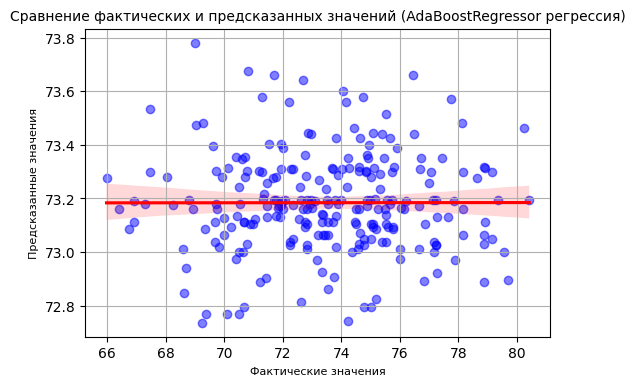

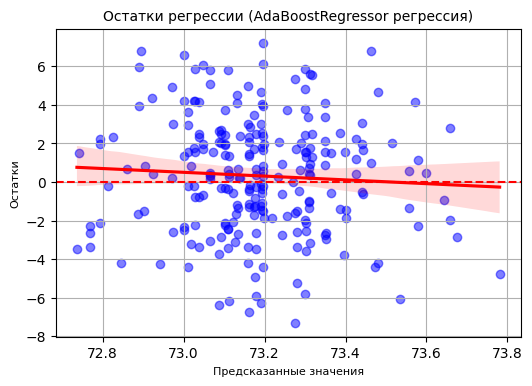

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, max_error, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

from sklearn.ensemble import AdaBoostRegressor
 
# Разделение на обучающую и тестовую выборки
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.3, random_state=1101)
 
# Определение числовых и категориальных столбцов
numeric_features = X.select_dtypes(include=['float64']).columns
categorical_features = X.select_dtypes(include=['category']).columns
 
# Создание преобразователей для числовых и категориальных данных
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

# Объединение преобразований в ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])
 
# Создание пайплана для модели
pipeline_AdaBoostRegressor = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', AdaBoostRegressor(
        n_estimators=200, 
        learning_rate=0.01, 
        loss='linear', 
        random_state=1101))
])
 
# Обучение модели с поиском по сетке
pipeline_AdaBoostRegressor.fit(X_train, y2_train)

# Предсказание на тестовой выборке
y_pred = pipeline_AdaBoostRegressor.predict(X_test)
 
# Вычисление метрик качества
r2 = r2_score(y2_test, y_pred) * -1
max_err = max_error(y2_test, y_pred)
mse = mean_squared_error(y2_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y2_test, y_pred)
mape = mean_absolute_percentage_error(y2_test, y_pred)
  
# Вывод метрик качества
print("\nМетрики качества на тестовой выборке:")
print(f"R2: {r2:.3f}")
print(f"Max Error: {max_err:.1f}")
print(f"MSE: {mse:.1f}")
print(f"RMSE: {rmse:.1f}")
print(f"MAE: {mae:.1f}")
print(f"MAPE: {mape:.2f}%")
 
# Визуализация результатов
plt.figure(figsize=(6, 4))
sns.regplot(x=y2_test, y=y_pred, color='blue', line_kws={'color': 'red'}, scatter_kws={'alpha':0.5})
plt.xlabel('Фактические значения', fontsize = 8)
plt.ylabel('Предсказанные значения', fontsize = 8)
plt.title('Сравнение фактических и предсказанных значений (AdaBoostRegressor регрессия)', fontsize = 10)
plt.grid(True)
plt.show()
 
# Визуализация остатков регрессии
residuals = y2_test['Модуль упругости при растяжении'] - y_pred
plt.figure(figsize=(6, 4))
sns.regplot(x=y_pred, y=residuals, color='blue', line_kws={'color': 'red'}, scatter_kws={'alpha':0.5})
#sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Предсказанные значения', fontsize = 8)
plt.ylabel('Остатки', fontsize = 8)
plt.title('Остатки регрессии (AdaBoostRegressor регрессия)', fontsize = 10)
plt.grid(True)
plt.show()

In [7]:
pipeline_AdaBoostRegressor

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Плотность', 'Модуль упругости', 'Количество отвердителя',
       'Содержание эпоксидных групп', 'Температура вспышки',
       'Поверхностная плотность', 'Потребление смолы', 'Шаг нашивки',
       'Плотность нашивки'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  Index(['Угол нашивки'], dtype='object'))])),
                ('model',
                 AdaBoostRegressor(learning_rate=0.01, n_estimators=200,
                                   random_state=1101))])

In [9]:
import pickle
 
# Сохранение модели в файл
with open('pipeline_AdaBoostRegressor_model_2.pkl', 'wb') as f:
    pickle.dump(pipeline_AdaBoostRegressor, f, protocol=5)